In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def format_plot(axs, type):

    for ax in axs:
        for ax in ax:
            if(type == 'spectra'):
                ax.set_xlabel('wavelength [nm]', fontsize = 22)
                ax.set_xticks([400,500,600,700,800,900,1000])
            else:
                ax.set_xlabel('phase angle [°]', fontsize = 22)
                ax.set_xticks([0,30,60,90,120,150,180])

            ax.tick_params(labelsize = 18, length = 10)
            ax.grid(lw = 0.5, alpha = 0.5)

    axs[1,2].yaxis.tick_right()
    axs[0,2].yaxis.tick_right()
    axs[0,1].tick_params(length = 0)
    axs[0,1].set_yticklabels([])
    axs[1,1].set_yticklabels([])
    axs[1,1].tick_params(axis='y', length = 0)
    
    axs[0,0].set_ylabel('Reflectivity', fontsize = 22)
    axs[1,0].set_ylabel('Polarization [%]', fontsize = 22)

    for i in range(3):
        axs[0,i].set_xticklabels([])
        axs[0,i].tick_params(axis='x', length = 0)
        axs[0,i].set_xlabel(' ')
    plt.subplots_adjust(wspace=0.03, hspace = 0.05)

def plot_data(axs, data, f_albedo, color, label, sigma, j):
    
    data[:,1] *= f_albedo 
    axs[0,j].plot(data[:,0,0], np.mean(data[:,1], axis = 1), color = color, label = label, lw = 3)
    axs[1,j].plot(data[:,0,0], np.mean(data[:,-1], axis = 1) * 100, color = color, lw = 3)
    axs[0,j].fill_between(data[:,0,0], np.mean(data[:,1], axis = 1) - sigma * np.std(data[:,1], axis = 1), 
                        np.mean(data[:,1], axis = 1) + sigma * np.std(data[:,1], axis = 1), alpha = 0.3, color = color)
    axs[1,j].fill_between(data[:,0,0], np.mean(data[:,-1], axis = 1) * 100 - sigma * np.std(data[:,-1], axis = 1) * 100, 
                        np.mean(data[:,-1], axis = 1) * 100 + sigma * np.std(data[:,-1], axis = 1) * 100, alpha = 0.2, color = color)
    


In [3]:
sigma = 1
phase = [60, 90, 120]
wl = [500, 700, 900]

In [4]:
dates = np.genfromtxt('dates.txt', dtype = 'str')
dates_ocean = dates[np.where(dates[:,4] == 'P')]
dates_atlantic = dates[np.where(dates[:,4] == 'A')]

In [5]:
# Scaling factor for intensity
d = 384400000
R = 6378000
theta = 1.25
f_albedo = pow(2*d*np.sin(theta * np.pi / 180) / R,2)

## Cloud generator convergence

In [6]:
f_zooms = np.arange(1,17,1,dtype='int')
wvl = [500, 700, 900]

I_max = np.zeros((len(wvl),len(f_zooms)))
I_exp = np.zeros((len(wvl),len(f_zooms)))

for j in range(len(wvl)):
        I_max[j] = np.load("data/CloudGeneratorConvergence/convergence_max_ran_%dnm.npy"%wvl[j])[1]  
        I_exp[j] = np.load("data/CloudGeneratorConvergence/convergence_exp_ran_%dnm.npy"%wvl[j])[1]  

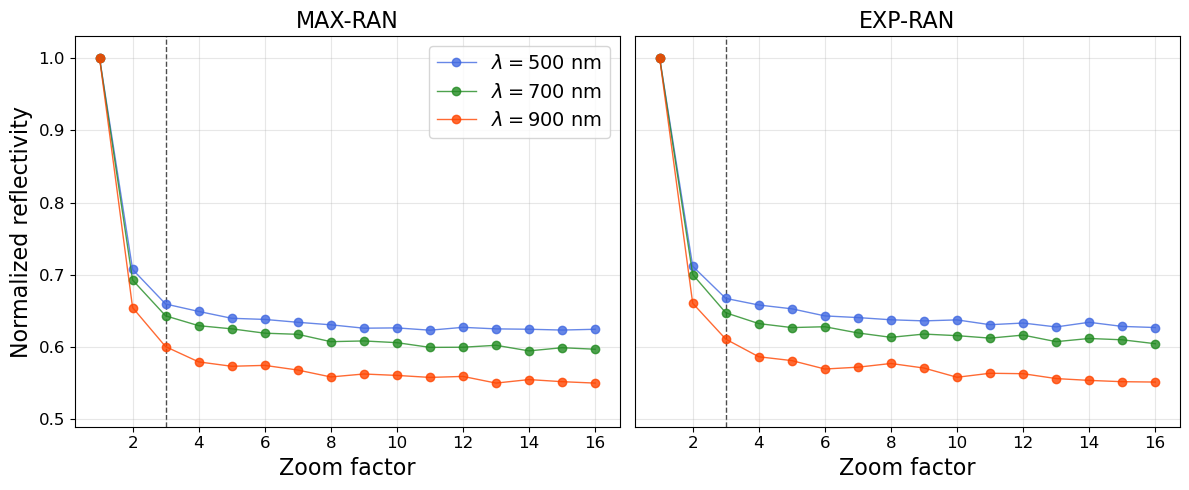

In [7]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
colors = ["royalblue", "forestgreen", "orangered"]

for i in range(0,3):
    axs[0].plot(f_zooms, I_max[i] / I_max[i,0], marker='o', lw=1, alpha=0.8, label=r'$\lambda = %s$ nm'%wvl[i], color=colors[i])
    axs[1].plot(f_zooms, I_exp[i] / I_exp[i,0], marker='o', lw=1, alpha=0.8, color=colors[i])

for ax in axs:
    ax.set_ylim(0.49,1.03)
    ax.grid(alpha=0.3)
    ax.set_xlabel("Zoom factor", fontsize=16)
    ax.tick_params(labelsize = 12)
    ax.set_xticks([2,4,6,8,10,12,14,16])
    ax.axvline(3, color='black', ls = '--', lw=1, alpha=0.7, zorder=0)

axs[0].set_title("MAX-RAN", fontsize=16)
axs[1].set_title("EXP-RAN", fontsize=16)
axs[0].set_ylabel("Normalized reflectivity", fontsize=16)
axs[0].legend(loc='upper right', fontsize=14)
axs[1].set_yticklabels([]);
axs[1].tick_params(axis='y', length = 0)

fig.tight_layout()
fig.savefig("Figures/convergence.png", dpi=300)

## Cloud generator

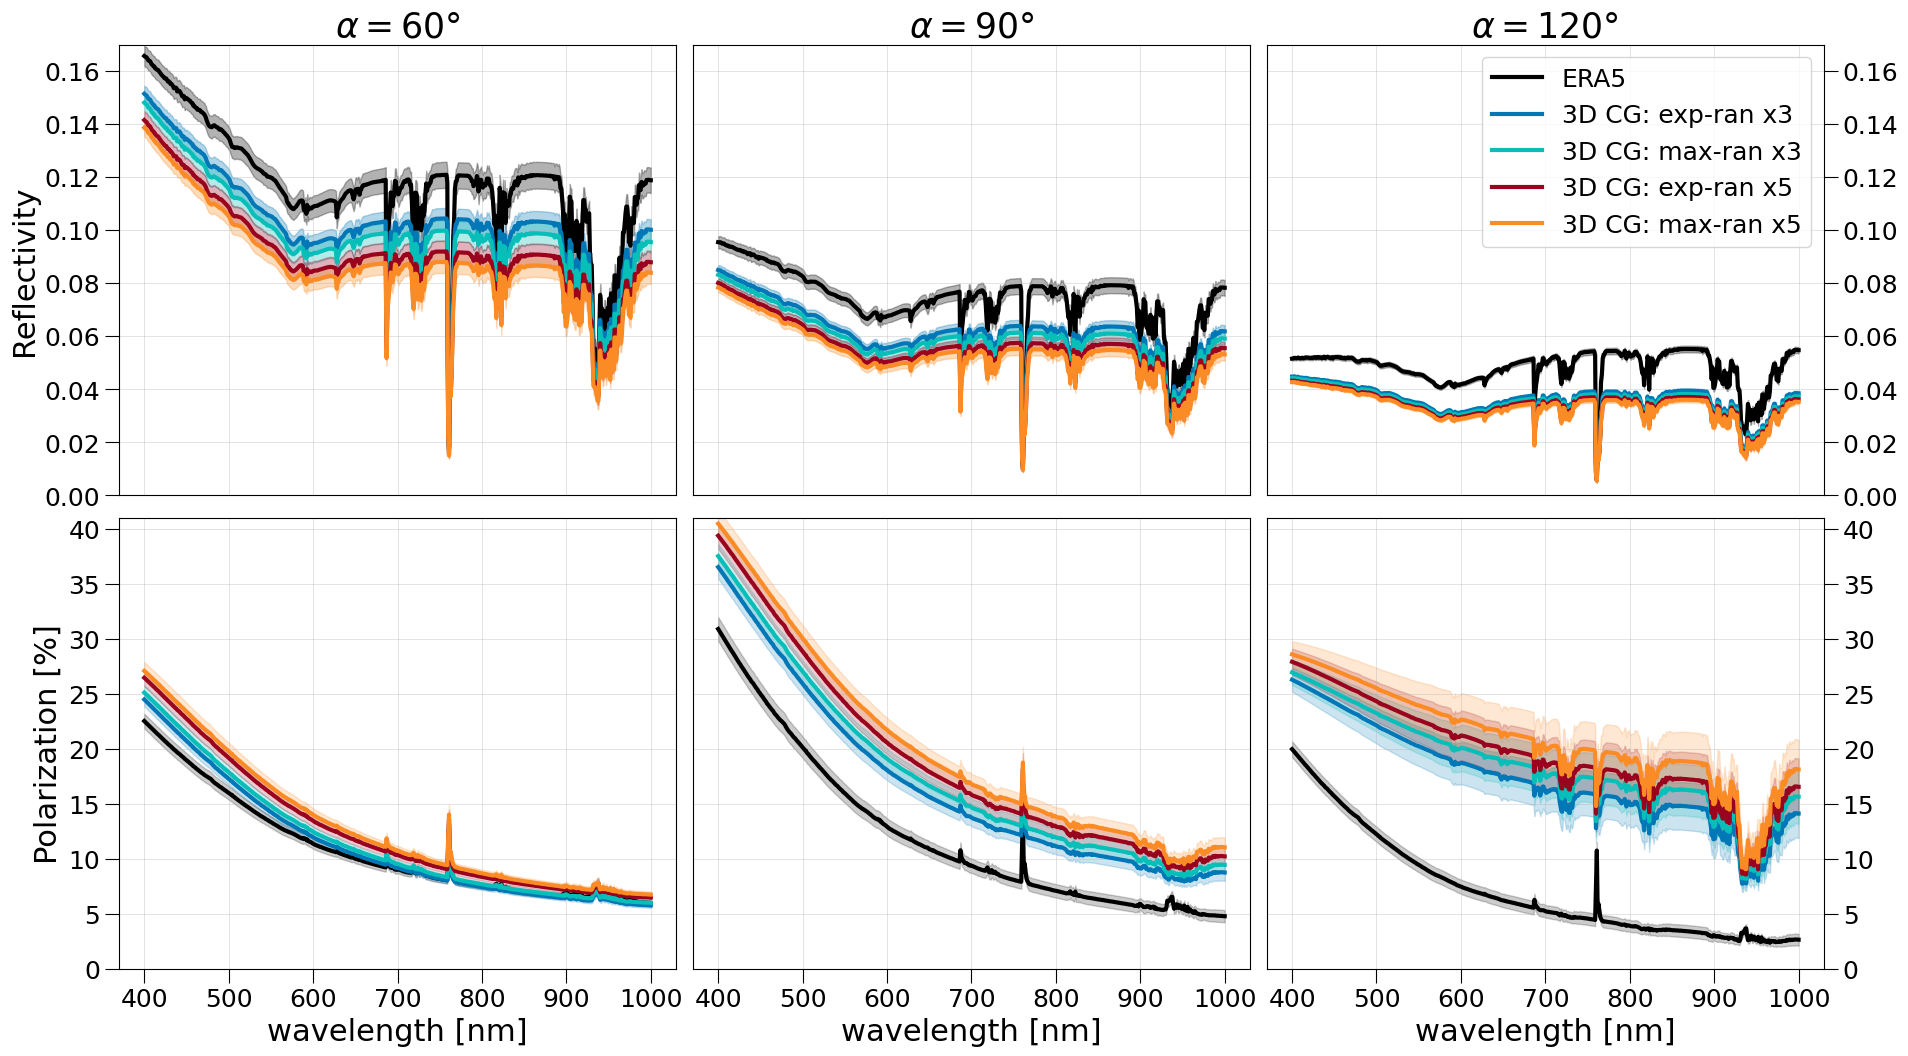

In [8]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(phase)): 

    ERA5 = np.zeros((601, 6, len(dates_ocean)))
    CG_exp_ran_x3 = np.zeros((601, 6, len(dates_ocean)))
    CG_max_ran_x3 = np.zeros((601, 6, len(dates_ocean)))
    CG_exp_ran_x5 = np.zeros((601, 6, len(dates_ocean)))
    CG_max_ran_x5 = np.zeros((601, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]
        ERA5[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_ERA5_variable.npy'%(date_str, phase[j]))
        CG_exp_ran_x3[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))
        CG_max_ran_x3[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_max_ran_x3_variable.npy'%(date_str, phase[j]))
        CG_exp_ran_x5[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x5_variable.npy'%(date_str, phase[j]))
        CG_max_ran_x5[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_max_ran_x5_variable.npy'%(date_str, phase[j]))

    plot_data(axs, ERA5, f_albedo, '#000000', 'ERA5', sigma, j)
    plot_data(axs, CG_exp_ran_x3, f_albedo, '#0077b6', '3D CG: exp-ran x3', sigma, j)
    plot_data(axs, CG_max_ran_x3, f_albedo, '#07beb8', '3D CG: max-ran x3', sigma, j)
    plot_data(axs, CG_exp_ran_x5, f_albedo, '#9a031e', '3D CG: exp-ran x5', sigma, j)
    plot_data(axs, CG_max_ran_x5, f_albedo, '#fb8b24', '3D CG: max-ran x5', sigma, j)

    axs[0,j].set_ylim(0, 0.17)
    axs[1,j].set_ylim(0, 41)
    axs[0,j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)

axs[0,2].legend(fontsize = 18)
format_plot(axs, "spectra")

plt.savefig('Figures/Spectra_CG.png', dpi = 150, bbox_inches='tight')



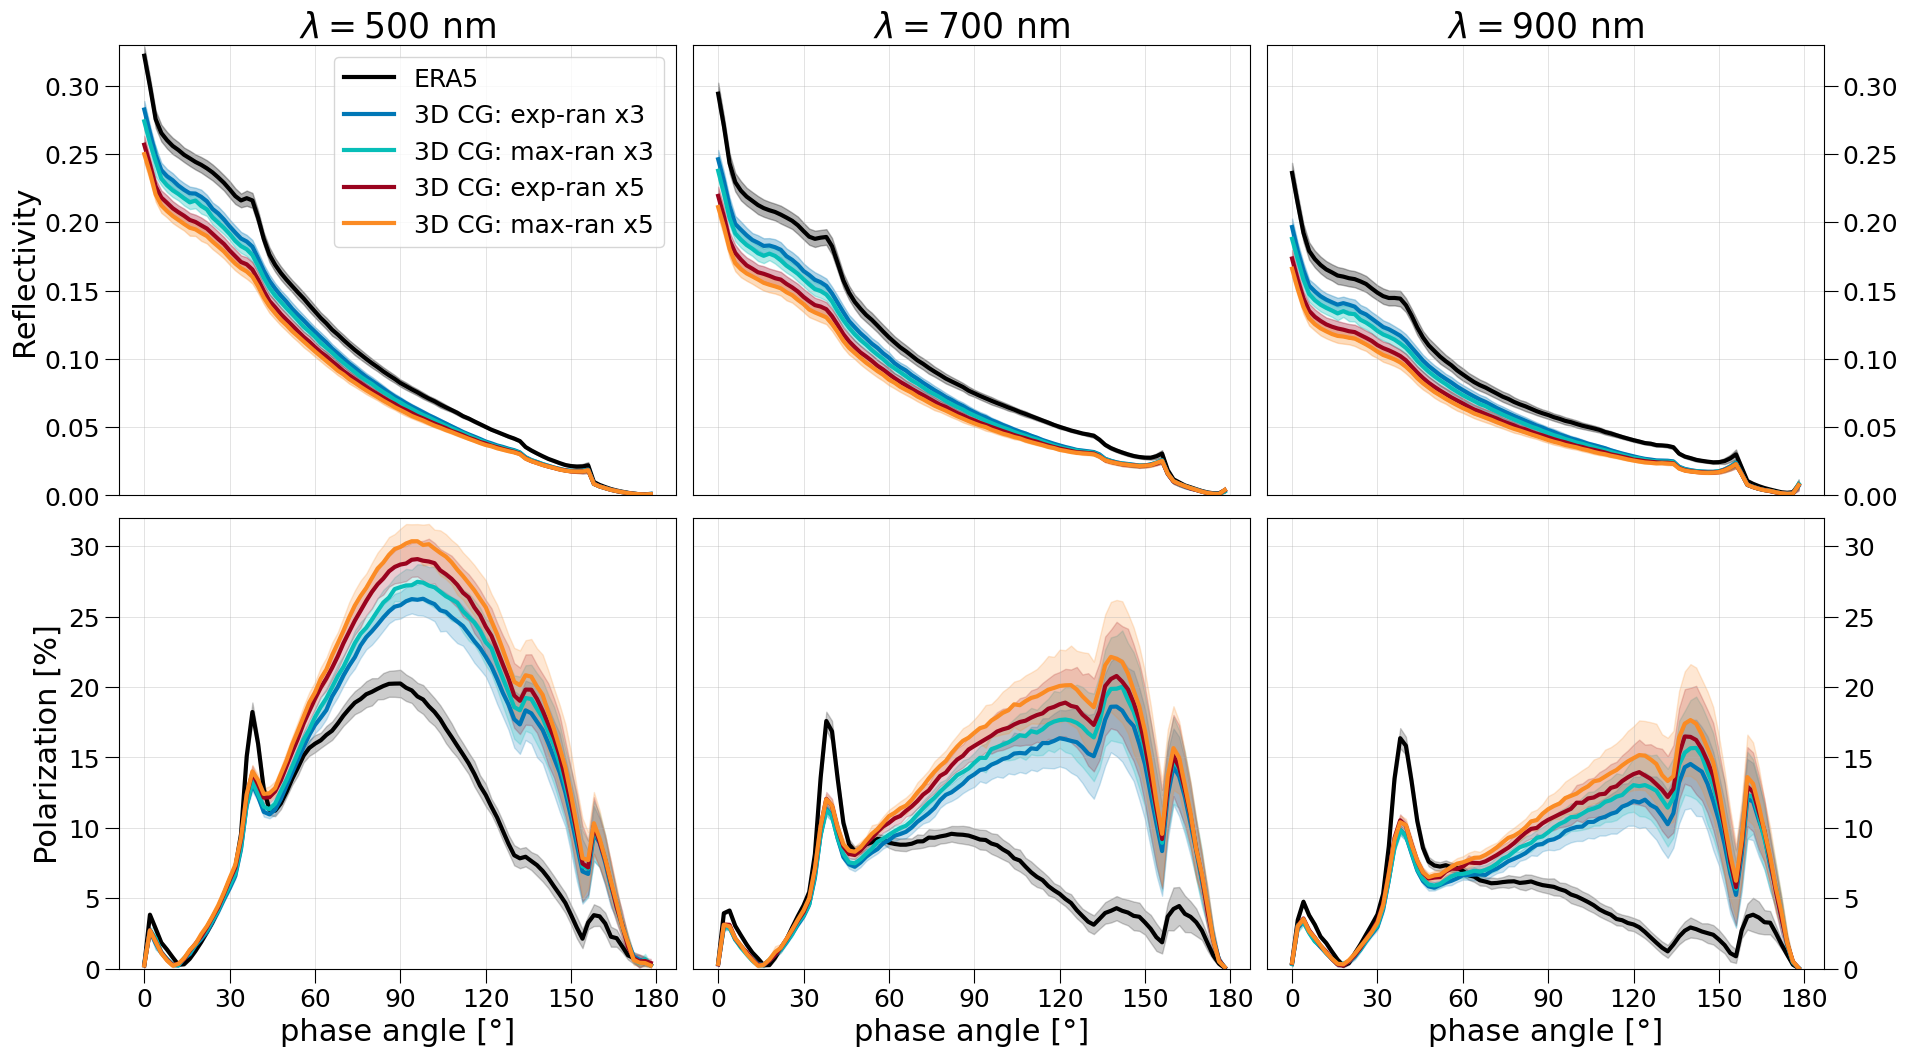

In [9]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(wl)): 
    
    ERA5 = np.zeros((90, 6, len(dates_ocean)))
    CG_exp_ran_x3 = np.zeros((90, 6, len(dates_ocean)))
    CG_max_ran_x3 = np.zeros((90, 6, len(dates_ocean)))
    CG_exp_ran_x5 = np.zeros((90, 6, len(dates_ocean)))
    CG_max_ran_x5 = np.zeros((90, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]

        ERA5[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_ERA5_variable.npy'%(date_str, wl[j]))
        CG_exp_ran_x3[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_variable.npy'%(date_str, wl[j]))
        CG_max_ran_x3[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_CG_max_ran_x3_variable.npy'%(date_str, wl[j]))
        CG_exp_ran_x5[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x5_variable.npy'%(date_str, wl[j]))
        CG_max_ran_x5[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_CG_max_ran_x5_variable.npy'%(date_str, wl[j]))

    plot_data(axs, ERA5, f_albedo, '#000000', 'ERA5', sigma, j)
    plot_data(axs, CG_exp_ran_x3, f_albedo, '#0077b6', '3D CG: exp-ran x3', sigma, j)
    plot_data(axs, CG_max_ran_x3, f_albedo, '#07beb8', '3D CG: max-ran x3', sigma, j)
    plot_data(axs, CG_exp_ran_x5, f_albedo, '#9a031e', '3D CG: exp-ran x5', sigma, j)
    plot_data(axs, CG_max_ran_x5, f_albedo, '#fb8b24', '3D CG: max-ran x5', sigma, j)

    axs[0,j].set_ylim(0, 0.33)
    axs[1,j].set_ylim(0, 32)
    axs[0,j].set_title(r'$\lambda = %s$ nm'%wl[j], fontsize = 25)

axs[0,0].legend(fontsize = 18)
format_plot(axs, "phase")

plt.savefig('Figures/Phase_curve_CG.png', dpi = 150, bbox_inches='tight')


## Clouds zoom-out

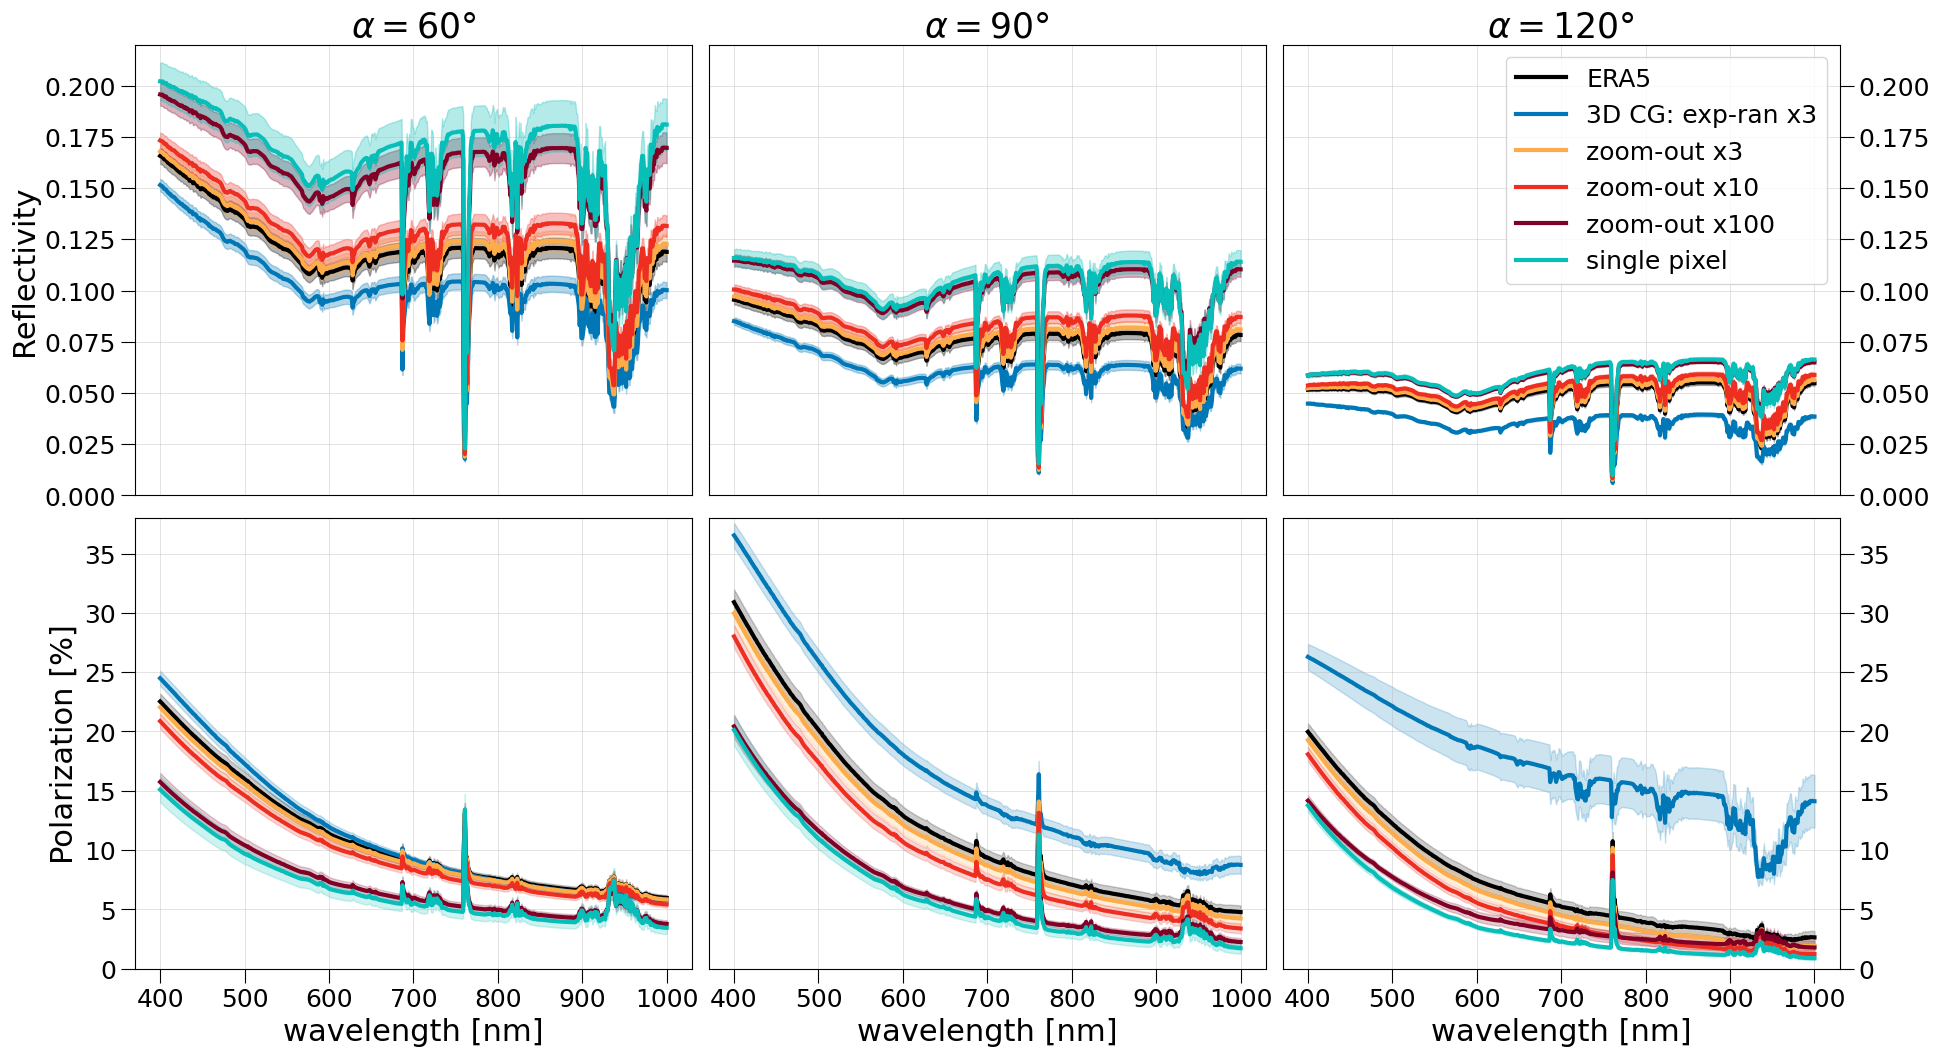

In [10]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')
cmap = plt.get_cmap('YlOrRd')
rgba = cmap(np.linspace(0.4,1,3))

for j in range(len(phase)): 

    ERA5 = np.zeros((601, 6, len(dates_ocean)))
    CG_exp_ran_x3 = np.zeros((601, 6, len(dates_ocean)))
    Zoom_out_x3 = np.zeros((601, 6, len(dates_ocean)))
    Zoom_out_x10 = np.zeros((601, 6, len(dates_ocean)))
    Zoom_out_x100 = np.zeros((601, 6, len(dates_ocean)))
    Single_pixel = np.zeros((601, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]
        ERA5[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_ERA5_variable.npy'%(date_str, phase[j]))
        Zoom_out_x3[:,:,i] = np.load('data/ZoomOut/Spectra/spectrum_%s_%ddeg_zoom_out_x3_variable.npy'%(date_str, phase[j]))
        Zoom_out_x10[:,:,i] = np.load('data/ZoomOut/Spectra/spectrum_%s_%ddeg_zoom_out_x10_variable.npy'%(date_str, phase[j]))
        Zoom_out_x100[:,:,i] = np.load('data/ZoomOut/Spectra/spectrum_%s_%ddeg_zoom_out_x100_variable.npy'%(date_str, phase[j]))
        CG_exp_ran_x3[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))
        Single_pixel[:,:,i] = np.load('data/ZoomOut/Spectra/spectrum_%s_%ddeg_single_pixel_zoom_out.npy'%(date_str, phase[j]))

    plot_data(axs, ERA5, f_albedo, '#000000', 'ERA5', sigma, j)
    plot_data(axs, CG_exp_ran_x3, f_albedo, '#0077b6', '3D CG: exp-ran x3', sigma, j)
    plot_data(axs, Zoom_out_x3, f_albedo, rgba[0], 'zoom-out x3', sigma, j)
    plot_data(axs, Zoom_out_x10, f_albedo, rgba[1], 'zoom-out x10', sigma, j)
    plot_data(axs, Zoom_out_x100, f_albedo, rgba[2], 'zoom-out x100', sigma, j)
    plot_data(axs, Single_pixel, f_albedo, '#07beb8', 'single pixel', sigma, j)

    axs[0,j].set_ylim(0, 0.22)
    axs[1,j].set_ylim(0, 38)
    axs[0,j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)

axs[0,2].legend(fontsize = 18)
format_plot(axs, "spectra")

plt.savefig('Figures/Spectra_zoom_out.png', dpi = 150, bbox_inches = 'tight')



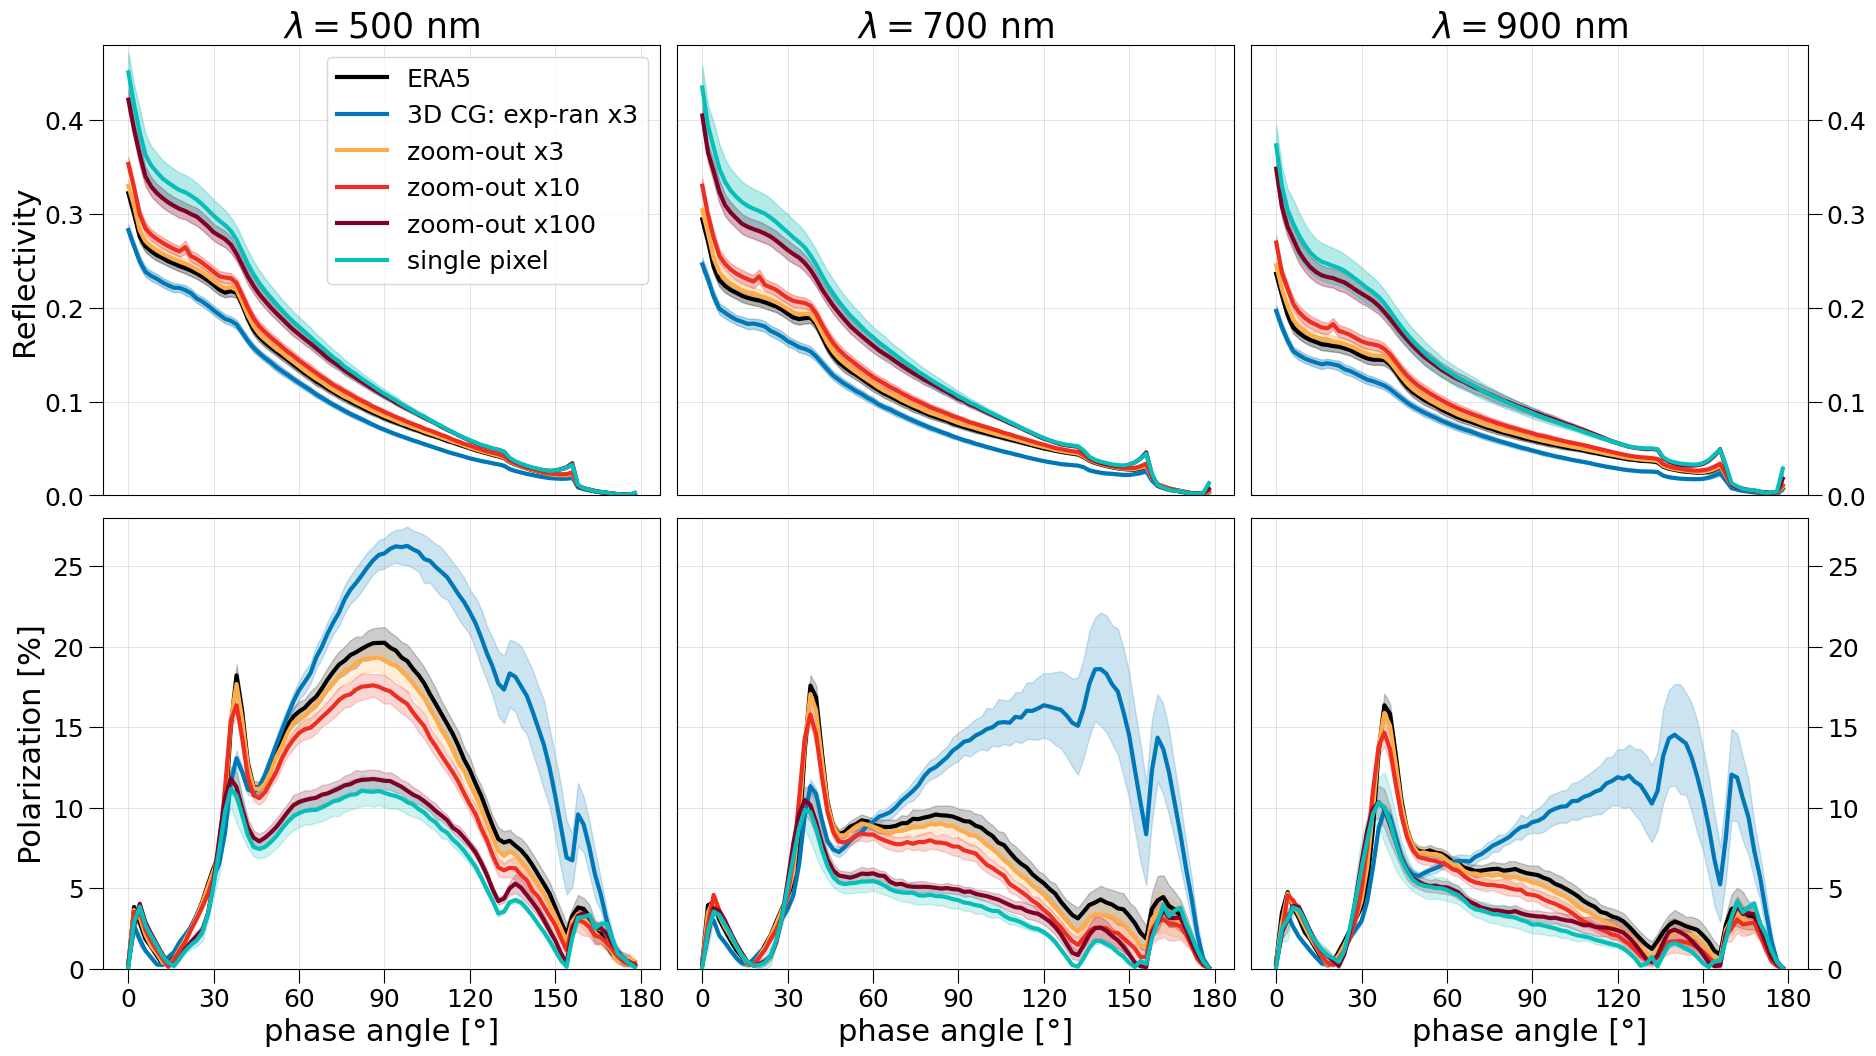

In [11]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(wl)): 
    
    ERA5 = np.zeros((90, 6, len(dates_ocean)))
    CG_exp_ran_x3 = np.zeros((90, 6, len(dates_ocean)))
    Zoom_out_x3 = np.zeros((90, 6, len(dates_ocean)))
    Zoom_out_x10 = np.zeros((90, 6, len(dates_ocean)))
    Zoom_out_x100 = np.zeros((90, 6, len(dates_ocean)))
    Single_pixel = np.zeros((90, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]

        ERA5[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_ERA5_variable.npy'%(date_str, wl[j]))
        CG_exp_ran_x3[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_variable.npy'%(date_str, wl[j]))
        Zoom_out_x3[:,:,i] = np.load('data/ZoomOut/PhaseCurves/phase_curve_%s_%dnm_zoom_out_x3_variable.npy'%(date_str, wl[j]))
        Zoom_out_x10[:,:,i] = np.load('data/ZoomOut/PhaseCurves/phase_curve_%s_%dnm_zoom_out_x10_variable.npy'%(date_str, wl[j]))
        Zoom_out_x100[:,:,i] = np.load('data/ZoomOut/PhaseCurves/phase_curve_%s_%dnm_zoom_out_x100_variable.npy'%(date_str, wl[j]))
        Single_pixel[:,:,i] = np.load('data/ZoomOut/PhaseCurves/phase_curve_%s_%dnm_downscaled_single_pixel_variable.npy'%(date_str, wl[j]))

    plot_data(axs, ERA5, f_albedo, '#000000', 'ERA5', sigma, j)
    plot_data(axs, CG_exp_ran_x3, f_albedo, '#0077b6', '3D CG: exp-ran x3', sigma, j)
    plot_data(axs, Zoom_out_x3, f_albedo, rgba[0], 'zoom-out x3', sigma, j)
    plot_data(axs, Zoom_out_x10, f_albedo, rgba[1], 'zoom-out x10', sigma, j)
    plot_data(axs, Zoom_out_x100, f_albedo, rgba[2], 'zoom-out x100', sigma, j)
    plot_data(axs, Single_pixel, f_albedo, '#07beb8', 'single pixel', sigma, j)

    axs[0,j].set_ylim(0, 0.48)
    axs[1,j].set_ylim(0, 28)
    axs[0,j].set_title(r'$\lambda = %s$ nm'%wl[j], fontsize = 25)

axs[0,0].legend(fontsize = 18)
format_plot(axs, "phase")

plt.savefig('Figures/Phase_curve_zoom_out.png', dpi = 150, bbox_inches = 'tight')




## Effective radius

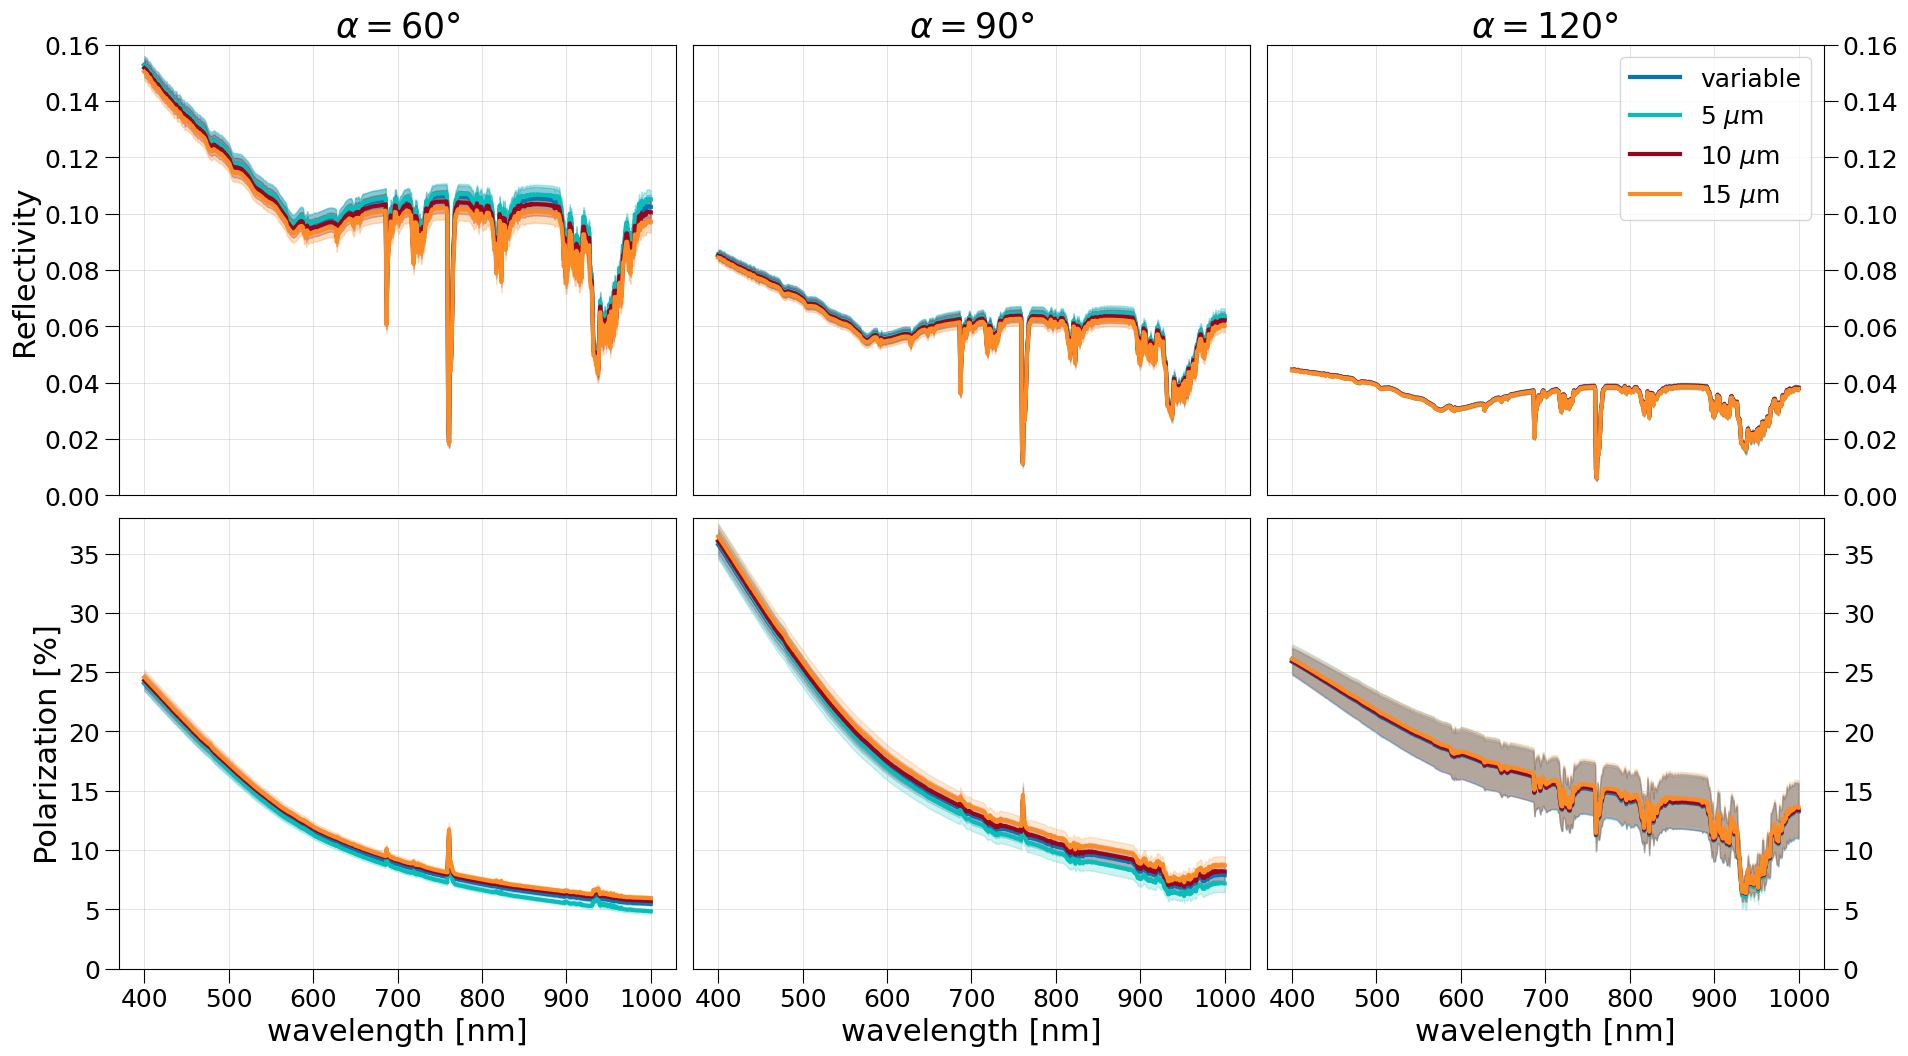

In [12]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(phase)): 

    clouds_5 = np.zeros((601, 6, len(dates_ocean)))
    clouds_10 = np.zeros((601, 6, len(dates_ocean)))
    clouds_15 = np.zeros((601, 6, len(dates_ocean)))
    clouds_variable = np.zeros((601, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]

        clouds_variable[:,:,i] = np.load('data/EffectiveRadius/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_fixed_radius_variable_and_30mu.npy'%(date_str, phase[j]))
        clouds_5[:,:,i] = np.load('data/EffectiveRadius/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_fixed_radius_5_and_30mu.npy'%(date_str, phase[j]))
        clouds_10[:,:,i] = np.load('data/EffectiveRadius/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_fixed_radius_10_and_30mu.npy'%(date_str, phase[j]))
        clouds_15[:,:,i] = np.load('data/EffectiveRadius/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_fixed_radius_15_and_30mu.npy'%(date_str, phase[j]))

    plot_data(axs, clouds_variable, f_albedo, '#0077b6', 'variable', sigma, j)
    plot_data(axs, clouds_5, f_albedo, '#07beb8', r'5 $\mu$m', sigma, j)
    plot_data(axs, clouds_10, f_albedo, '#9a031e', r'10 $\mu$m', sigma, j)
    plot_data(axs, clouds_15, f_albedo, '#fb8b24', r'15 $\mu$m', sigma, j)

    axs[0,j].set_ylim(0, 0.16)
    axs[1,j].set_ylim(0, 38)
    axs[0,j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)

axs[0,2].legend(fontsize = 18)
format_plot(axs, "spectra")

plt.savefig('Figures/Spectra_eff_radius.png', dpi = 150, bbox_inches='tight')



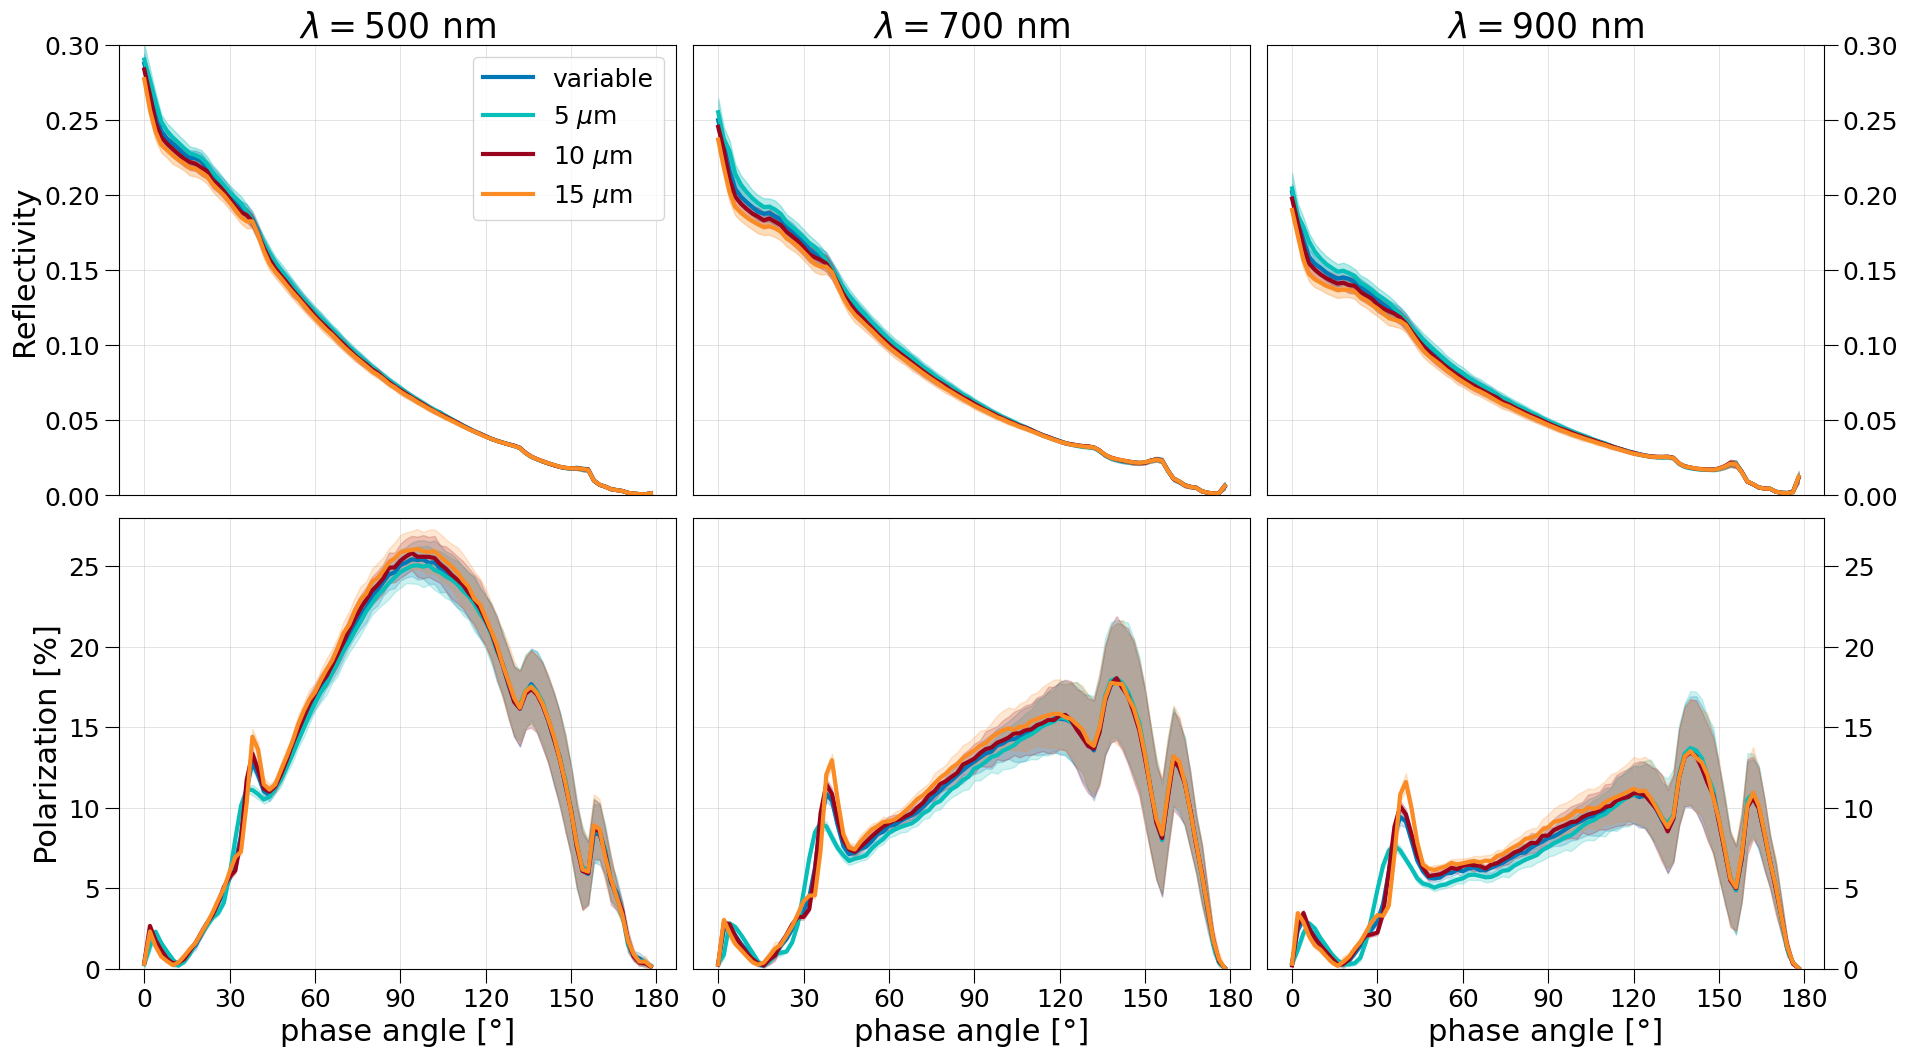

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(wl)): 
    
    clouds_variable = np.zeros((90, 6, len(dates_ocean)))
    clouds_5 = np.zeros((90, 6, len(dates_ocean)))
    clouds_10 = np.zeros((90, 6, len(dates_ocean)))
    clouds_15 = np.zeros((90, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]

        clouds_variable[:,:,i] = np.load('data/EffectiveRadius/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_fixed_radius_variable_and_30mu.npy'%(date_str, wl[j]))
        clouds_5[:,:,i] = np.load('data/EffectiveRadius/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_fixed_radius_5_and_30mu.npy'%(date_str, wl[j]))
        clouds_10[:,:,i] = np.load('data/EffectiveRadius/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_fixed_radius_10_and_30mu.npy'%(date_str, wl[j]))
        clouds_15[:,:,i] = np.load('data/EffectiveRadius/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_fixed_radius_15_and_30mu.npy'%(date_str, wl[j]))

    plot_data(axs, clouds_variable, f_albedo, '#0077b6', 'variable', sigma, j)
    plot_data(axs, clouds_5, f_albedo, '#07beb8', r'5 $\mu$m', sigma, j)
    plot_data(axs, clouds_10, f_albedo, '#9a031e', r'10 $\mu$m', sigma, j)
    plot_data(axs, clouds_15, f_albedo, '#fb8b24', r'15 $\mu$m', sigma, j)


    axs[0,j].set_ylim(0, 0.3)
    axs[1,j].set_ylim(0, 28)
    axs[0,j].set_title(r'$\lambda = %s$ nm'%wl[j], fontsize = 25)

axs[0,0].legend(fontsize = 18)
format_plot(axs, "phase")

plt.savefig('Figures/Phase_curve_eff_radius.png', dpi = 150, bbox_inches='tight')


## Wind speed

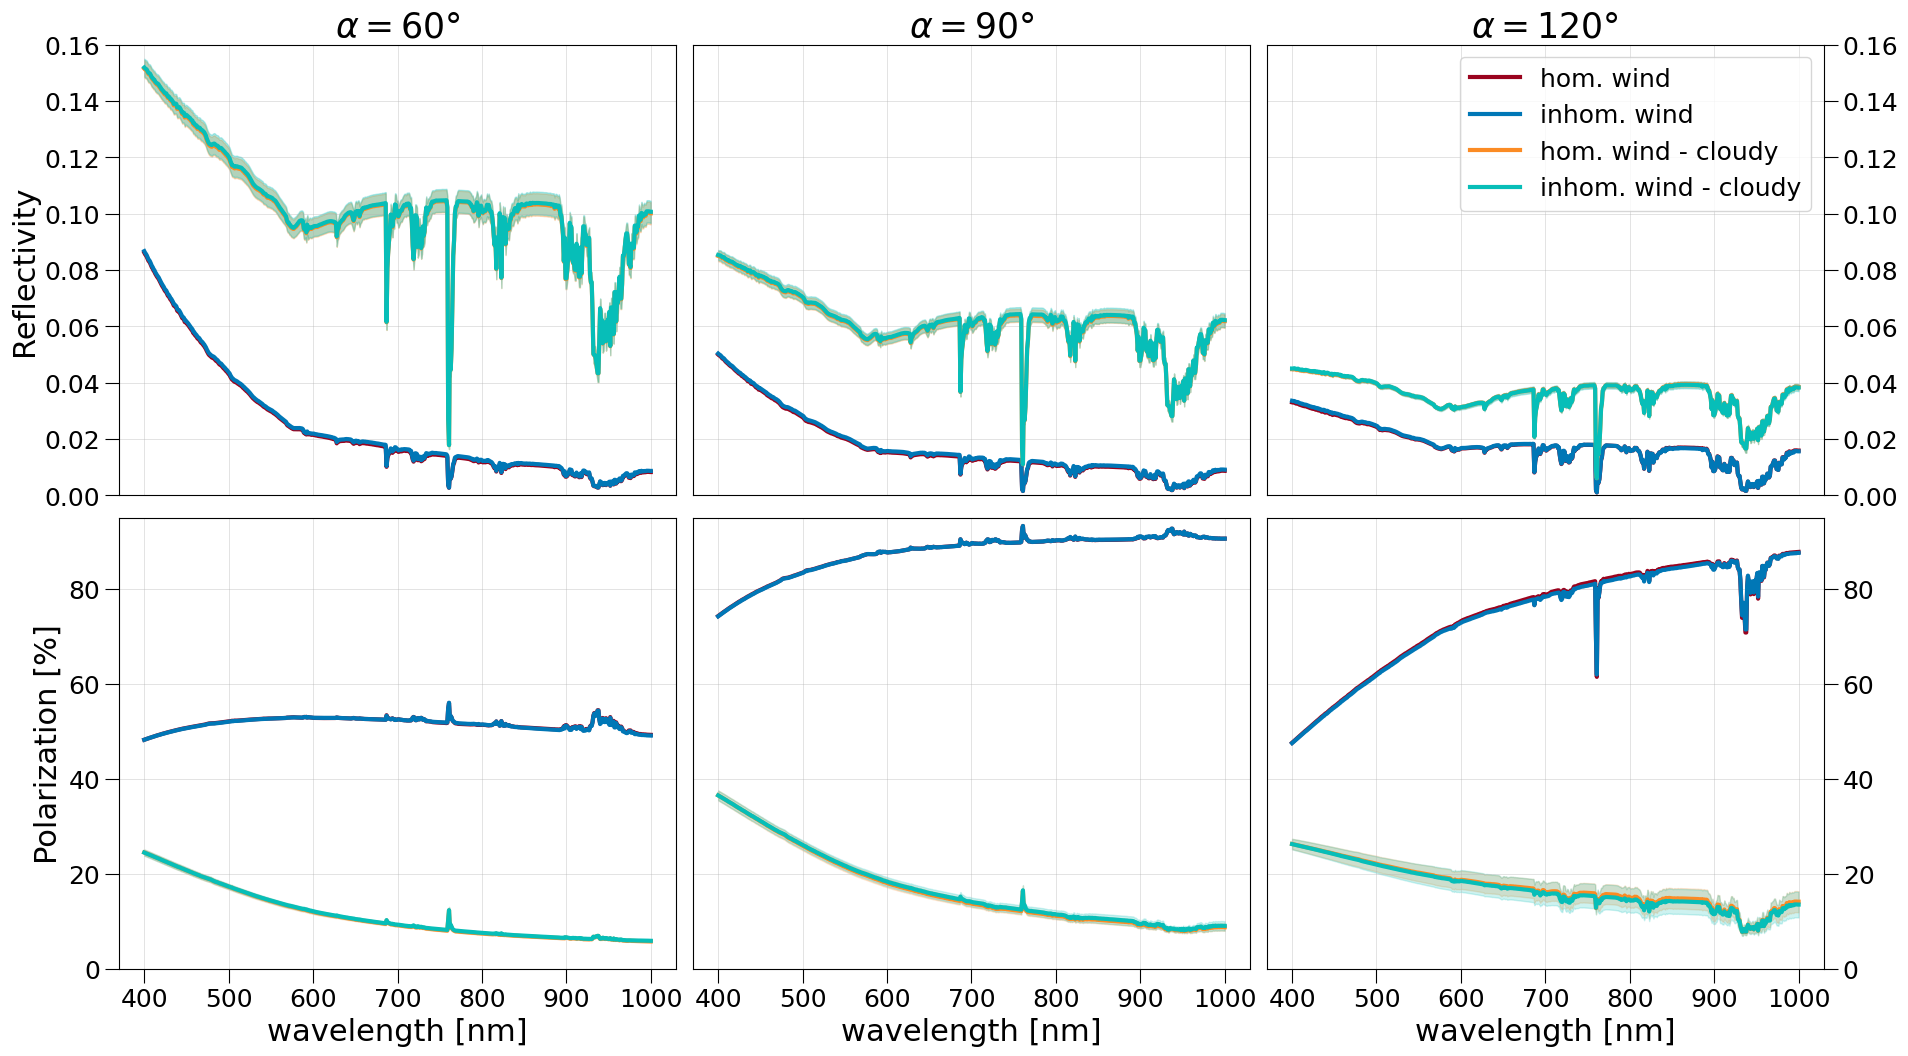

In [14]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')
wind = 10

for j in range(len(phase)): 

    hom = np.load('data/WindSpeed/Spectra/spectrum_%ddeg_hom_wind_no_clouds.npy'%(phase[j]))
    inhom = np.load('data/WindSpeed/Spectra/spectrum_%ddeg_inhom_wind_no_clouds.npy'%(phase[j]))

    hom[:,1] *= f_albedo
    inhom[:,1] *= f_albedo

    axs[0,j].plot(hom[:,0], hom[:,1], color = '#9a031e', label = 'hom. wind', lw = 3)
    axs[0,j].plot(inhom[:,0], inhom[:,1], color = '#0077b6', label = 'inhom. wind', lw = 3)
    axs[1,j].plot(hom[:,0], hom[:,-1]*100, color = '#9a031e', lw = 3)
    axs[1,j].plot(inhom[:,0], inhom[:,-1]*100, color = '#0077b6', lw = 3)

    hom_clouds = np.zeros((601, 6, len(dates_ocean)))
    inhom_clouds = np.zeros((601, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]

        hom_clouds[:,:,i] = np.load('data/WindSpeed/Spectra/spectrum_%s_%ddeg_hom_wind_%d.npy'%(date_str, phase[j], wind))
        inhom_clouds[:,:,i] = np.load('data/WindSpeed/Spectra/spectrum_%s_%ddeg_inhom_wind.npy'%(date_str, phase[j]))

    plot_data(axs, hom_clouds, f_albedo, '#fb8b24', 'hom. wind - cloudy', sigma, j)
    plot_data(axs, inhom_clouds, f_albedo, '#07beb8', 'inhom. wind - cloudy', sigma, j)


    axs[0,j].set_ylim(0, 0.16)
    axs[1,j].set_ylim(0, 95)
    axs[0,j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)

axs[0,2].legend(fontsize = 18)
format_plot(axs, "spectra")

plt.savefig('Figures/Spectra_wind.png', dpi = 150, bbox_inches='tight')



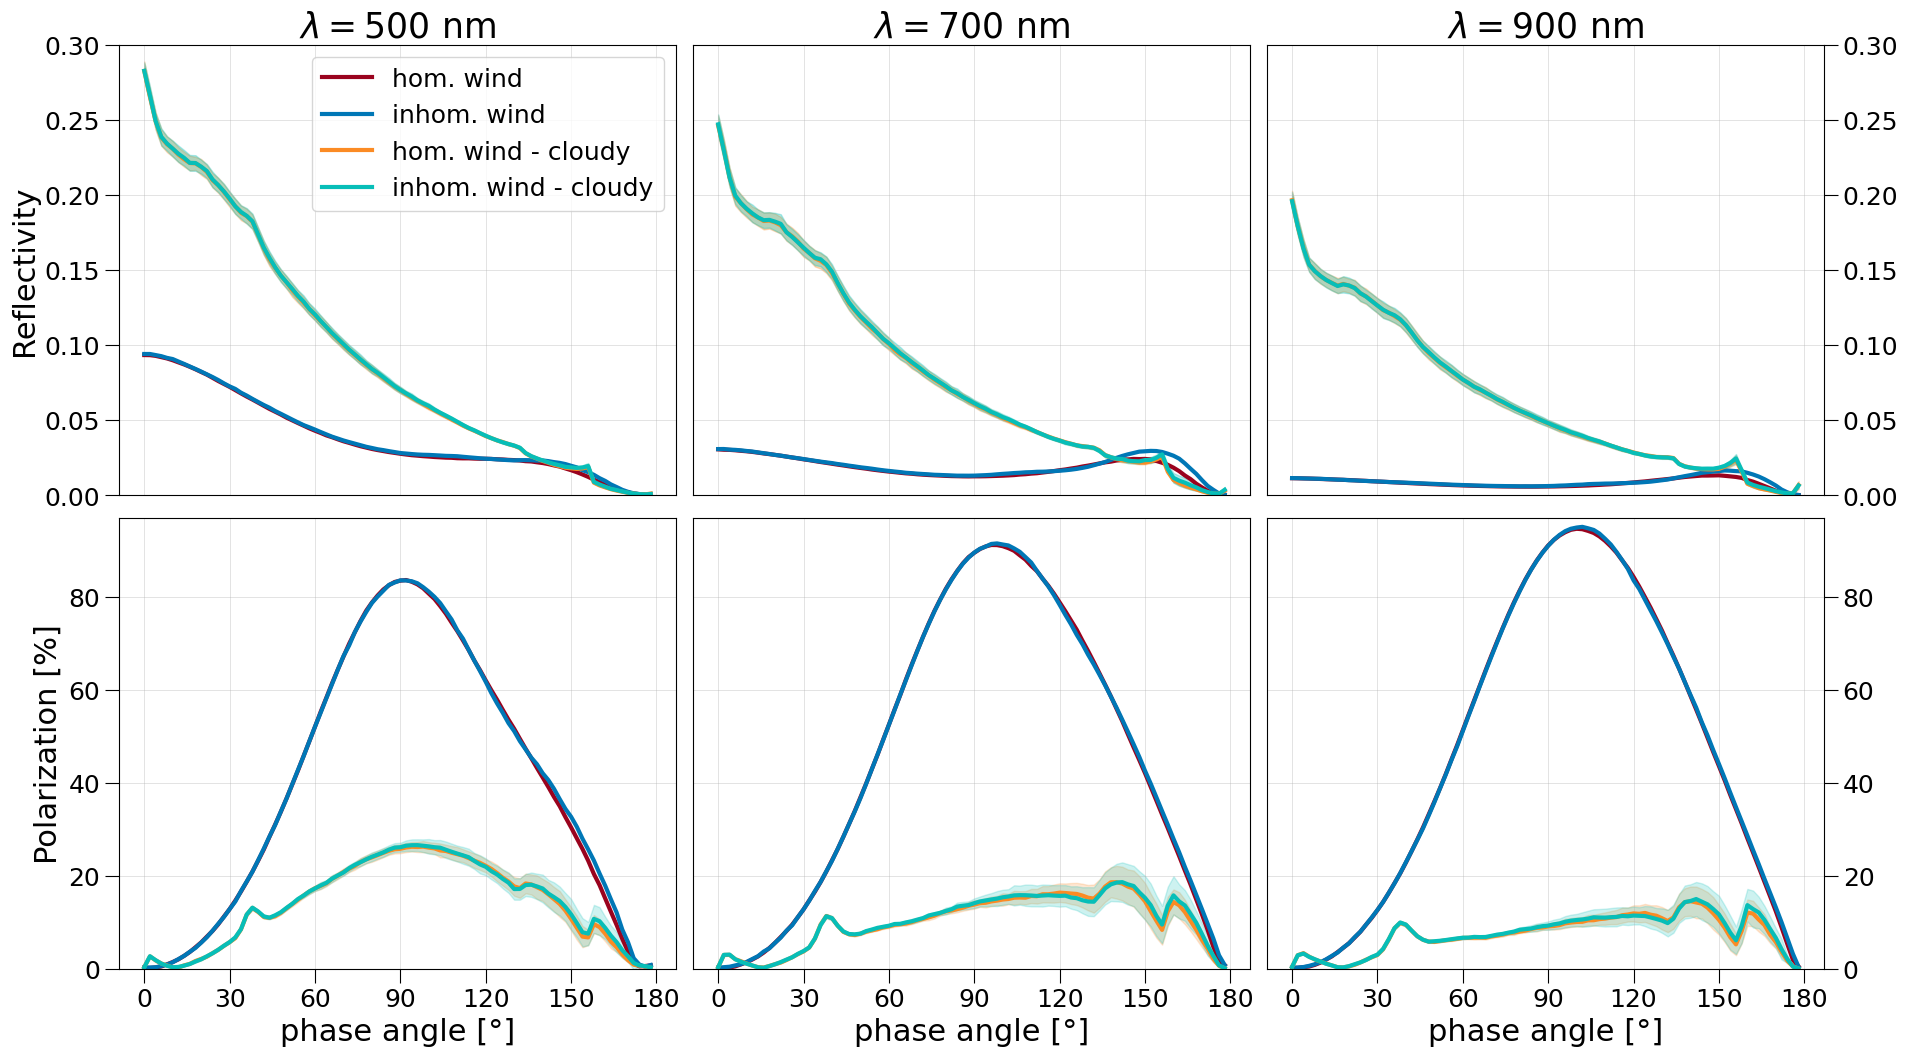

In [15]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(wl)): 
    hom = np.load('data/WindSpeed/PhaseCurves/phase_curve_%dnm_hom_wind_10_no_clouds.npy'%wl[j])
    inhom = np.load('data/WindSpeed/PhaseCurves/phase_curve_%dnm_inhom_wind_no_clouds.npy'%wl[j])

    hom[:,1] *= f_albedo
    inhom[:,1] *= f_albedo

    axs[0,j].plot(hom[:,0], hom[:,1], color = '#9a031e', label = 'hom. wind', lw = 3)
    axs[0,j].plot(inhom[:,0], inhom[:,1], color = '#0077b6', label = 'inhom. wind', lw = 3)
    axs[1,j].plot(hom[:,0], hom[:,-1]*100, color = '#9a031e', lw = 3)
    axs[1,j].plot(inhom[:,0], inhom[:,-1]*100, color = '#0077b6', lw = 3)
    
    hom_clouds = np.zeros((90, 6, len(dates_ocean)))
    inhom_clouds = np.zeros((90, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]

        hom_clouds[:,:,i] = np.load('data/WindSpeed/PhaseCurves/phase_curve_%s_%dnm_hom_wind_10.npy'%(date_str, wl[j]))
        inhom_clouds[:,:,i] = np.load('data/WindSpeed/PhaseCurves/phase_curve_%s_%dnm_inhom_wind.npy'%(date_str, wl[j]))
        
    plot_data(axs, hom_clouds, f_albedo, '#fb8b24', 'hom. wind - cloudy', sigma, j)
    plot_data(axs, inhom_clouds, f_albedo, '#07beb8', 'inhom. wind - cloudy', sigma, j)

    axs[0,j].set_ylim(0, 0.3)
    axs[1,j].set_ylim(0, 97)
    axs[0,j].set_title(r'$\lambda = %s$ nm'%wl[j], fontsize = 25)

axs[0,0].legend(fontsize = 18)
format_plot(axs, "phase")

plt.savefig('Figures/Phase_curve_wind.png', dpi = 150, bbox_inches='tight')


## Rocky planet albedo

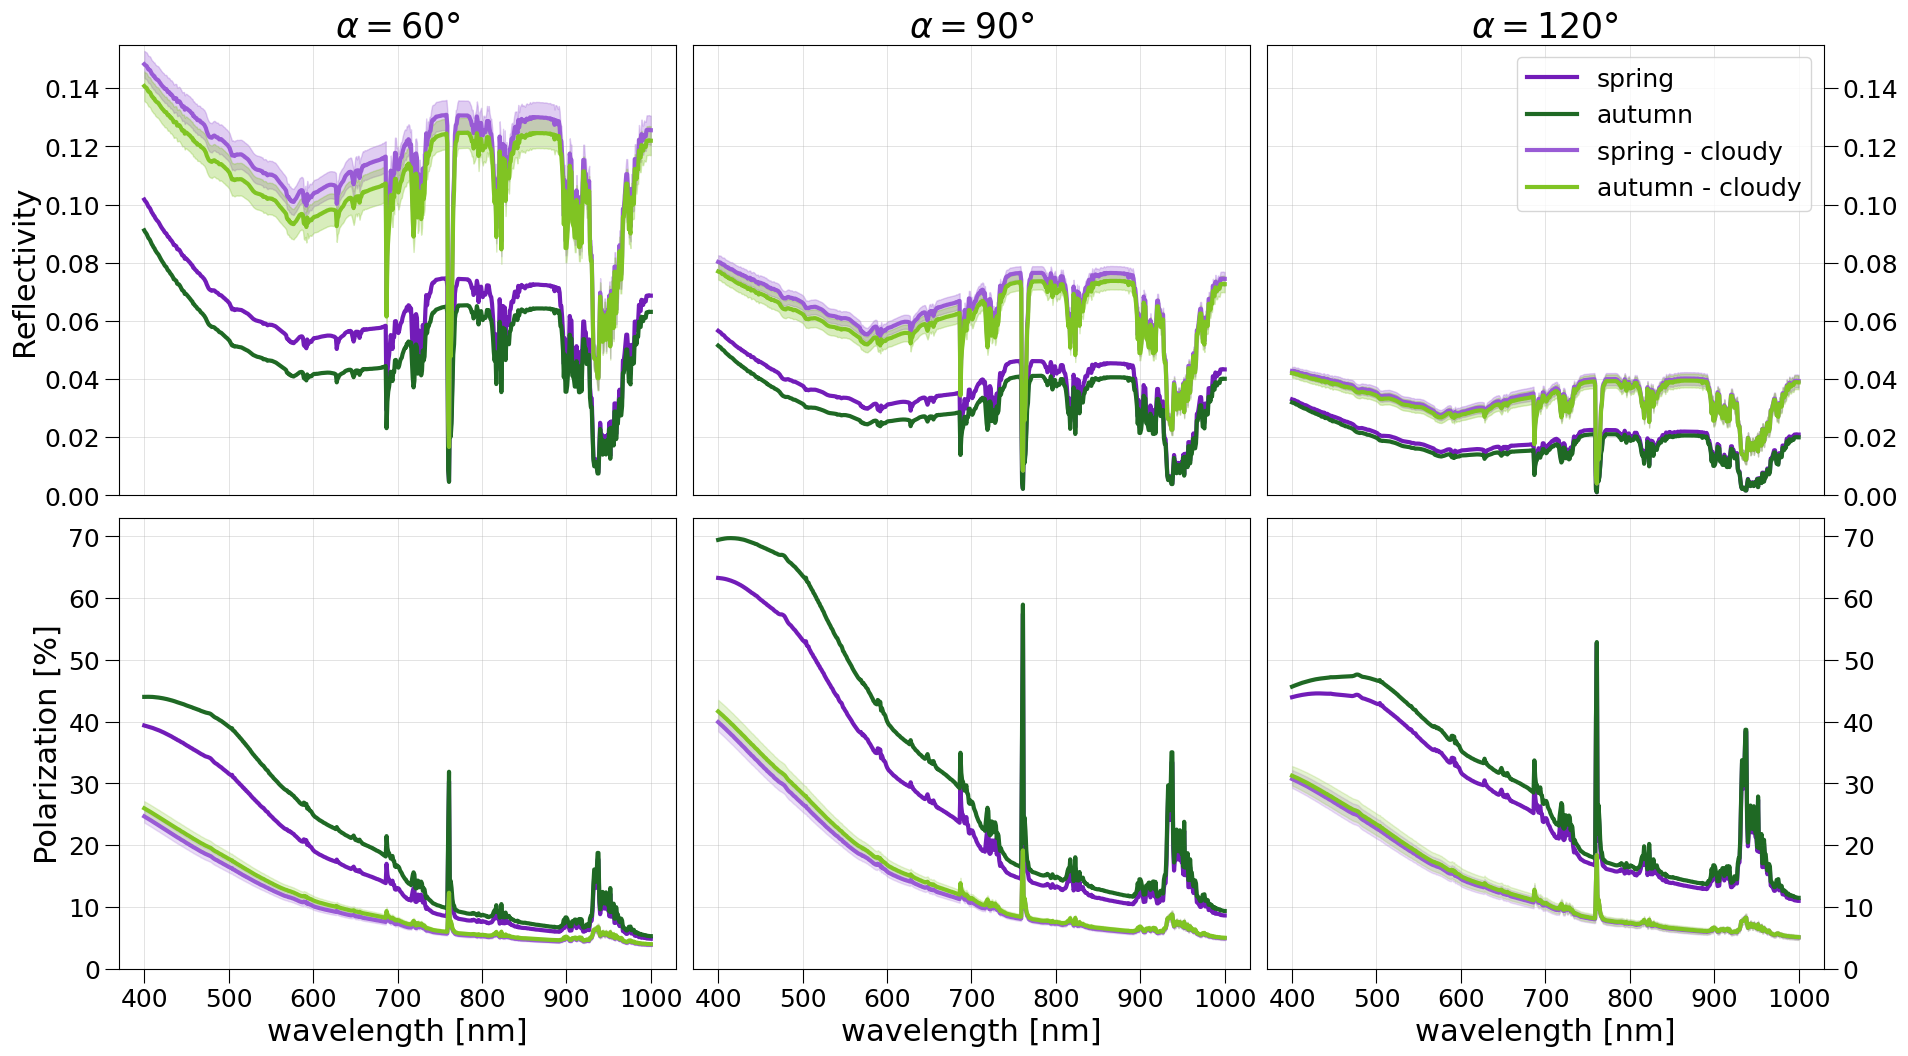

In [16]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')
wind = 10

for j in range(len(phase)): 

    spring = np.load('data/RockyPlanet/Spectra/spectrum_%ddeg_DOY080_no_clouds.npy'%phase[j])
    fall = np.load('data/RockyPlanet/Spectra/spectrum_%ddeg_DOY265_no_clouds.npy'%phase[j])

    spring[:,1] *= f_albedo 
    fall[:,1] *= f_albedo

    axs[0,j].plot(spring[:,0], spring[:,1], color = '#721cb8', label = 'spring', lw = 3)
    axs[0,j].plot(fall[:,0], fall[:,1], color = '#1f6924', label = 'autumn', lw = 3)
    axs[1,j].plot(spring[:,0], spring[:,-1]*100, color = '#721cb8', lw = 3)
    axs[1,j].plot(fall[:,0], fall[:,-1]*100, color = '#1f6924', lw = 3)

    spring_clouds = np.zeros((601, 6, len(dates_atlantic)))
    autumn_clouds = np.zeros((601, 6, len(dates_atlantic)))

    for i in range(len(dates_atlantic)):
        date_str = dates_atlantic[i,0]+'_'+dates_atlantic[i,1]+'_'+dates_atlantic[i,2]+'_T'+dates_atlantic[i,3]

        spring_clouds[:,:,i] = np.load('data/RockyPlanet/Spectra/spectrum_%s_%ddeg_DOY080_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))
        autumn_clouds[:,:,i] = np.load('data/RockyPlanet/Spectra/spectrum_%s_%ddeg_DOY265_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))

    plot_data(axs, spring_clouds, f_albedo, '#995bd5', 'spring - cloudy', sigma, j)
    plot_data(axs, autumn_clouds, f_albedo, '#80c423', 'autumn - cloudy', sigma, j)


    axs[0,j].set_ylim(0, 0.155)
    axs[1,j].set_ylim(0, 73)
    axs[0,j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)

axs[0,2].legend(fontsize = 18)
format_plot(axs, "spectra")

plt.savefig('Figures/Spectra_albedo.png', dpi = 150, bbox_inches='tight')



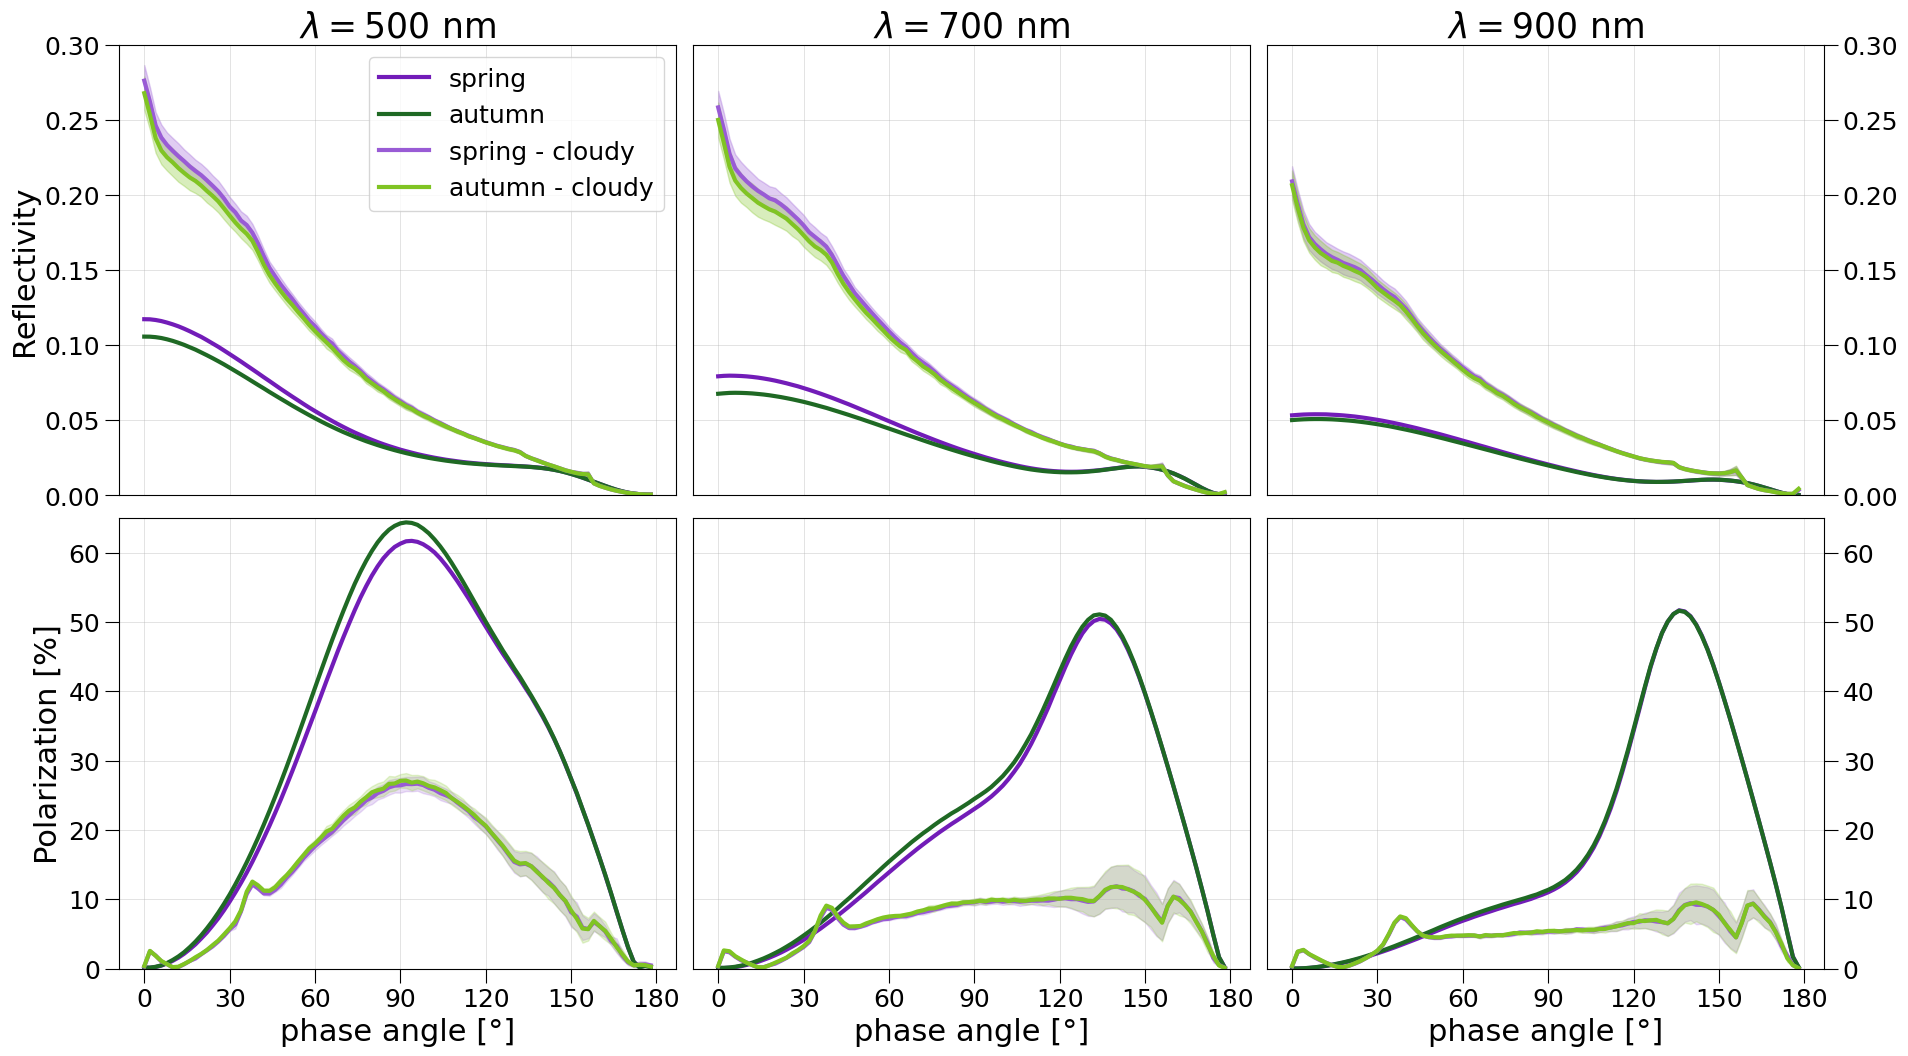

In [17]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(wl)): 
    spring = np.load('data/RockyPlanet/PhaseCurves/phase_curve_%dnm_DOY080_no_clouds_test.npy'%wl[j])
    fall = np.load('data/RockyPlanet/PhaseCurves/phase_curve_%dnm_DOY265_no_clouds_test.npy'%wl[j])

    spring[:,1] *= f_albedo 
    fall[:,1] *= f_albedo

    axs[0,j].plot(spring[:,0], spring[:,1], color = '#721cb8', label = 'spring', lw = 3)
    axs[0,j].plot(fall[:,0], fall[:,1], color = '#1f6924', label = 'autumn', lw = 3)
    axs[1,j].plot(spring[:,0], spring[:,-1]*100, color = '#721cb8', lw = 3)
    axs[1,j].plot(fall[:,0], fall[:,-1]*100, color = '#1f6924', lw = 3)
    
    spring_clouds = np.zeros((90, 6, len(dates_atlantic)))
    autumn_clouds = np.zeros((90, 6, len(dates_atlantic)))

    for i in range(len(dates_atlantic)):
        date_str = dates_atlantic[i,0]+'_'+dates_atlantic[i,1]+'_'+dates_atlantic[i,2]+'_T'+dates_atlantic[i,3]

        spring_clouds[:,:,i] = np.load('data/RockyPlanet/PhaseCurves/phase_curve_%s_%dnm_DOY080_CG_exp_ran_x3_variable_new.npy'%(date_str, wl[j]))
        autumn_clouds[:,:,i] = np.load('data/RockyPlanet/PhaseCurves/phase_curve_%s_%dnm_DOY265_CG_exp_ran_x3_variable_new.npy'%(date_str, wl[j]))
        
    plot_data(axs, spring_clouds, f_albedo, '#995bd5', 'spring - cloudy', sigma, j)
    plot_data(axs, autumn_clouds, f_albedo, '#80c423', 'autumn - cloudy', sigma, j)

    axs[0,j].set_ylim(0, 0.3)
    axs[1,j].set_ylim(0, 65)
    axs[0,j].set_title(r'$\lambda = %s$ nm'%wl[j], fontsize = 25)

axs[0,0].legend(fontsize = 18)
format_plot(axs, "phase")

plt.savefig('Figures/Phase_curve_albedo.png', dpi = 150, bbox_inches = 'tight')


## Model comparison

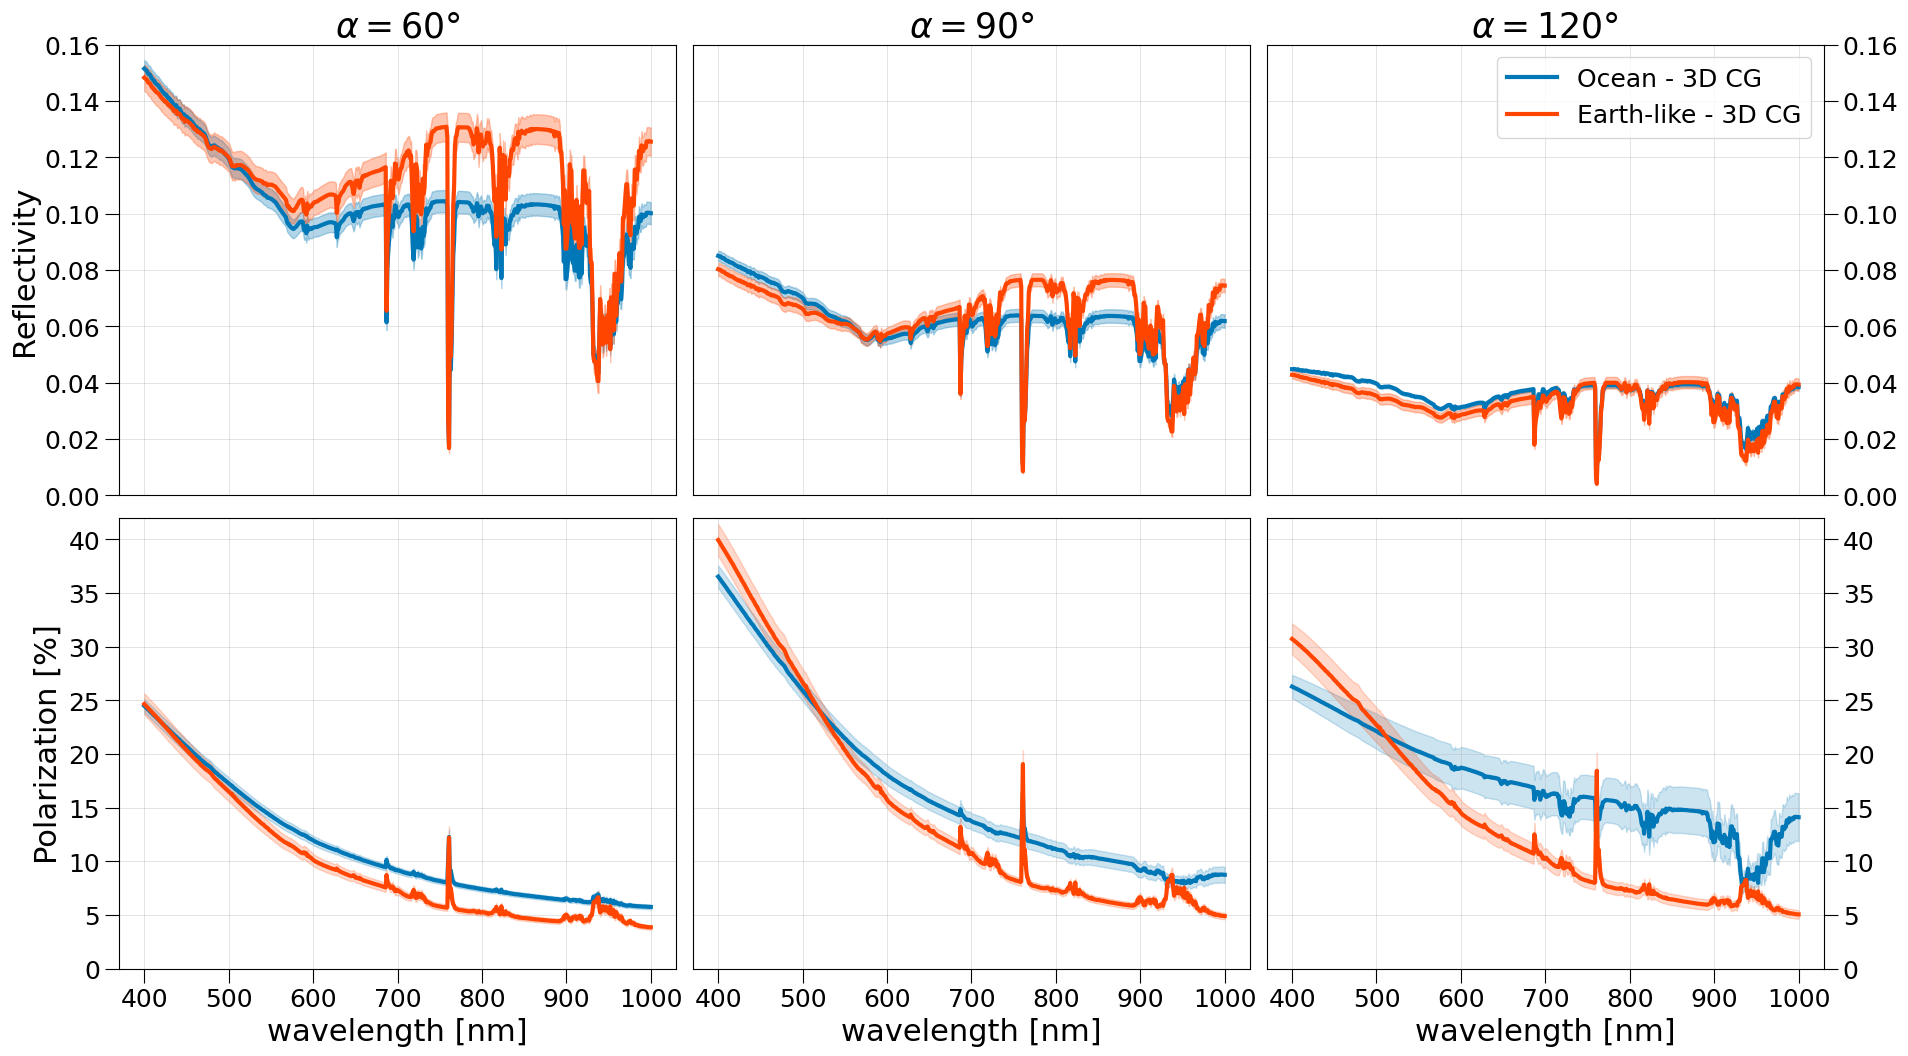

In [18]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(phase)): 

    pacific = np.zeros((601, 6, len(dates_ocean)))
    atlantic = np.zeros((601, 6, len(dates_ocean)))

    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]
        pacific[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))
    
    for i in range(len(dates_atlantic)):
        date_str = dates_atlantic[i,0]+'_'+dates_atlantic[i,1]+'_'+dates_atlantic[i,2]+'_T'+dates_atlantic[i,3]
        atlantic[:,:,i] = np.load('data/RockyPlanet/Spectra/spectrum_%s_%ddeg_DOY080_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))

    plot_data(axs, pacific, f_albedo, '#0077b6', 'Ocean - 3D CG', sigma, j)
    plot_data(axs, atlantic, f_albedo, 'orangered', 'Earth-like - 3D CG', sigma, j)


    axs[0,j].set_ylim(0, 0.16)
    axs[1,j].set_ylim(0, 42)
    axs[0,j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)

axs[0,2].legend(fontsize = 18)
format_plot(axs, "spectra")

plt.savefig('Figures/Spectra_comparison.png', dpi = 150, bbox_inches='tight')



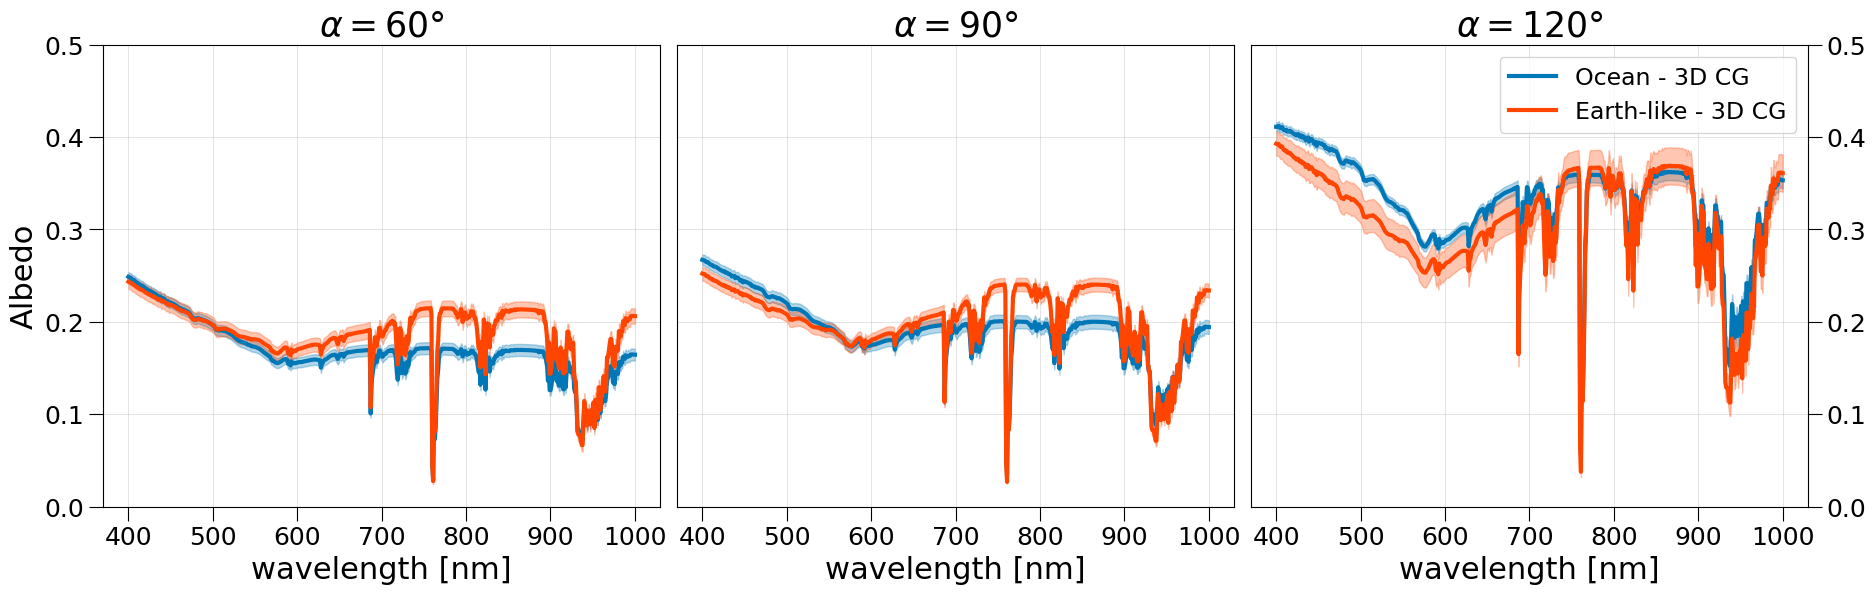

In [19]:
def lambertian_phase_curve(alpha):
    alpha = alpha * np.pi / 180
    return (np.sin(alpha) + (np.pi - alpha)*np.cos(alpha)) / np.pi

fig, axs = plt.subplots(1, 3, figsize = (22,6), facecolor = 'w')

for j in range(len(phase)): 

    pacific = np.zeros((601, 6, len(dates_ocean)))
  
    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]
        pacific[:,:,i] = np.load('data/CloudGenerator/Spectra/spectrum_%s_%ddeg_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))

    pacific[:,1] *= f_albedo
    pacific[:,1] /= lambertian_phase_curve(phase[j])

    axs[j].plot(pacific[:,0,0], np.mean(pacific[:,1], axis = 1), color = '#0077b6', label = 'Ocean - 3D CG', lw = 3)
    axs[j].fill_between(pacific[:,0,0], np.mean(pacific[:,1], axis = 1) - sigma * np.std(pacific[:,1], axis = 1), 
                        np.mean(pacific[:,1], axis = 1) + sigma * np.std(pacific[:,1], axis = 1), alpha = 0.3, color = '#0077b6')


    atlantic = np.zeros((601, 6, len(dates_atlantic)))
    for i in range(len(dates_atlantic)):
        date_str = dates_atlantic[i,0]+'_'+dates_atlantic[i,1]+'_'+dates_atlantic[i,2]+'_T'+dates_atlantic[i,3]

        atlantic[:,:,i] = np.load('data/RockyPlanet/Spectra/spectrum_%s_%ddeg_DOY080_CG_exp_ran_x3_variable.npy'%(date_str, phase[j]))

    atlantic[:,1] *= f_albedo 
    atlantic[:,1] /= lambertian_phase_curve(phase[j])
    
    axs[j].plot(atlantic[:,0,0], np.mean(atlantic[:,1], axis = 1), color = 'orangered', label = 'Earth-like - 3D CG', lw = 3)
    axs[j].fill_between(atlantic[:,0,0], np.mean(atlantic[:,1], axis = 1) - sigma * np.std(atlantic[:,1], axis = 1), 
                        np.mean(atlantic[:,1], axis = 1) + sigma * np.std(atlantic[:,1], axis = 1), alpha = 0.3, color = 'orangered')
    
    axs[j].set_ylim(0, 0.5)
    axs[j].set_title(r'$\alpha = %s$°'%phase[j], fontsize = 25)



for ax in axs:
    ax.set_xlabel('wavelength [nm]', fontsize = 22)
    ax.tick_params(labelsize = 18, length = 10)
    ax.grid(lw = 0.5, alpha = 0.5)
    ax.set_xticks([400,500,600,700,800,900,1000])

axs[2].legend(fontsize = 17)
axs[2].yaxis.tick_right()
axs[1].tick_params(axis='y', length = 0)
axs[1].set_yticklabels([])
axs[0].set_ylabel('Albedo', fontsize = 22)
plt.subplots_adjust(wspace=0.03, hspace = 0.05)

plt.savefig('Figures/Albedo_comparison.png', dpi = 150, bbox_inches='tight')

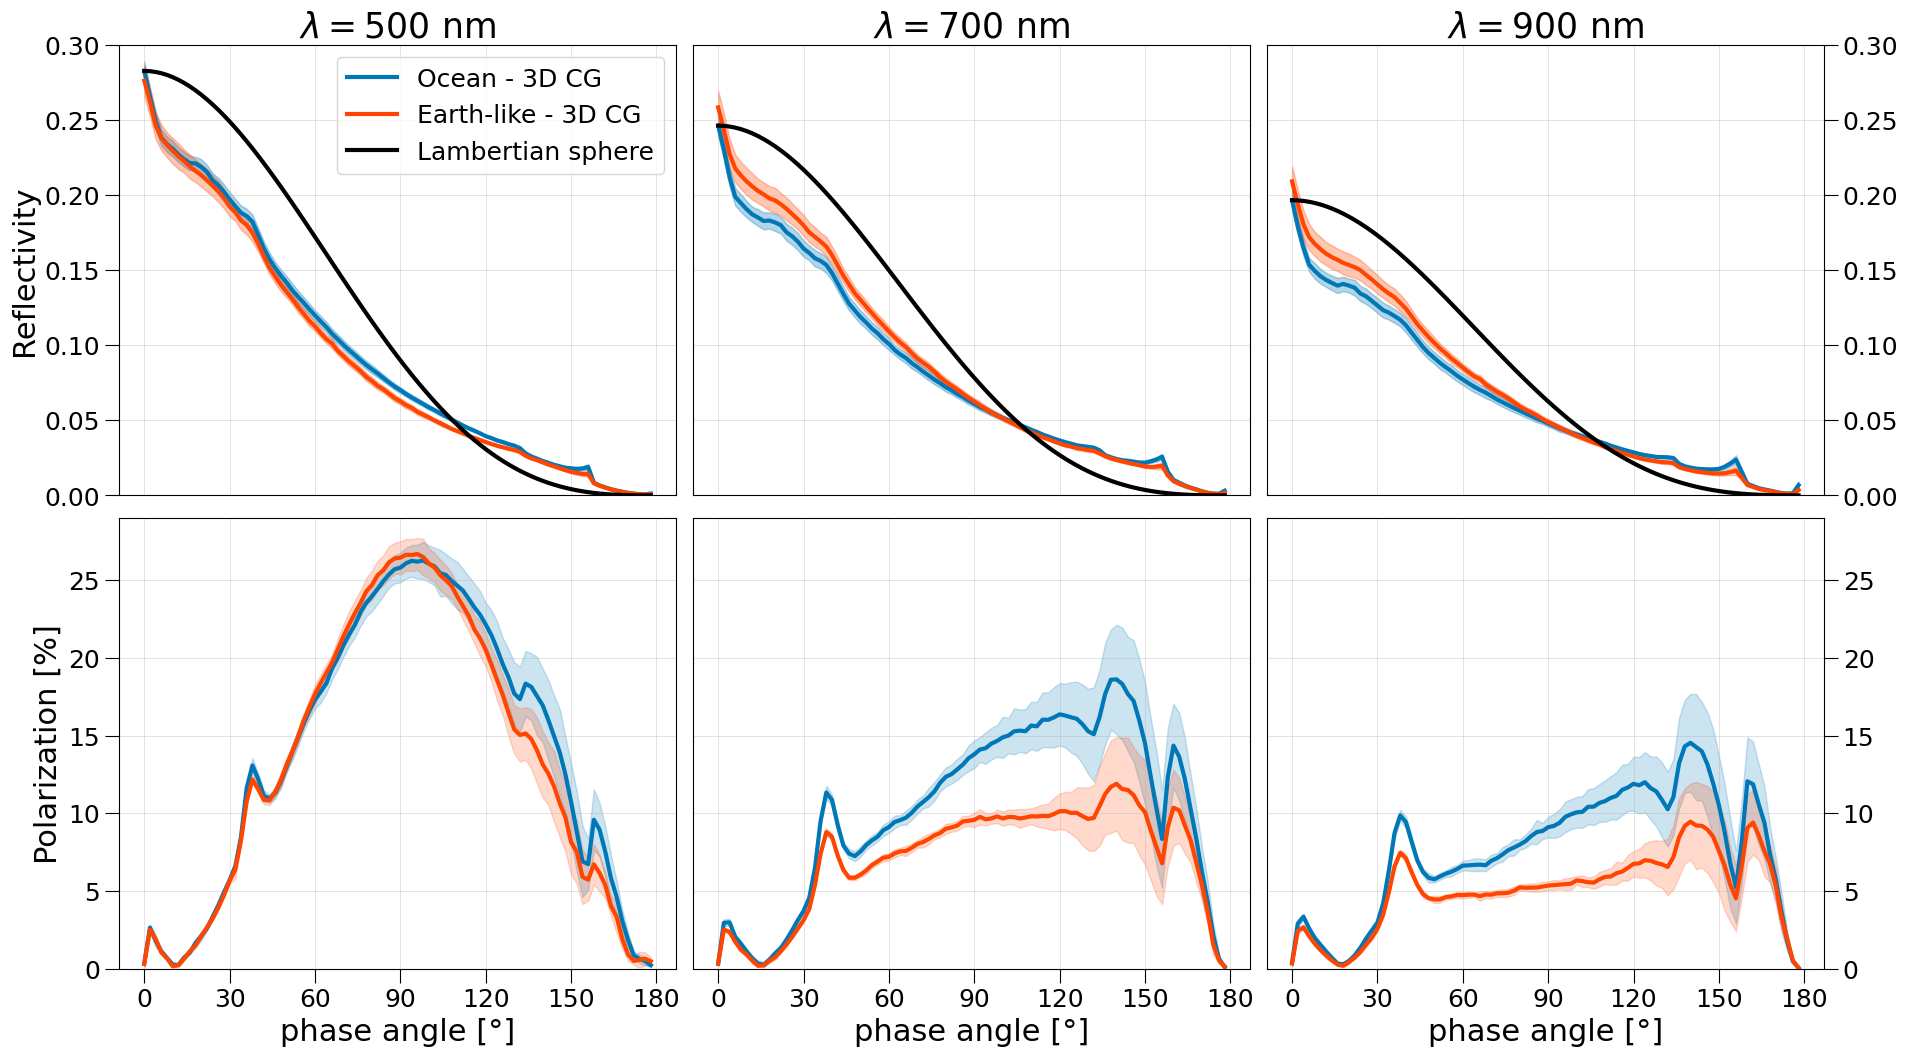

In [20]:
fig, axs = plt.subplots(2, 3, figsize = (22,12), facecolor = 'w')

for j in range(len(wl)): 

    pacific = np.zeros((90, 6, len(dates_ocean)))
    atlantic = np.zeros((90, 6, len(dates_ocean)))


    for i in range(len(dates_ocean)):
        date_str = dates_ocean[i,0]+'_'+dates_ocean[i,1]+'_'+dates_ocean[i,2]+'_T'+dates_ocean[i,3]
        pacific[:,:,i] = np.load('data/CloudGenerator/PhaseCurves/phase_curve_%s_%dnm_CG_exp_ran_x3_variable.npy'%(date_str, wl[j]))

    for i in range(len(dates_atlantic)):
        date_str = dates_atlantic[i,0]+'_'+dates_atlantic[i,1]+'_'+dates_atlantic[i,2]+'_T'+dates_atlantic[i,3]
        atlantic[:,:,i] = np.load('data/RockyPlanet/PhaseCurves/phase_curve_%s_%dnm_DOY080_CG_exp_ran_x3_variable_new.npy'%(date_str, wl[j]))
        
    plot_data(axs, pacific, f_albedo, '#0077b6', 'Ocean - 3D CG', sigma, j)
    plot_data(axs, atlantic, f_albedo, 'orangered', 'Earth-like - 3D CG', sigma, j)

    phi = []
    for itheta in pacific[:,0,0]:
        phi.append(lambertian_phase_curve(itheta))
    phi = np.array(phi)
    axs[0,j].plot(pacific[:,0,0], phi*np.mean(pacific[:,1], axis = 1)[0], color='black', label='Lambertian sphere', lw=3)

    axs[0,j].set_ylim(0, 0.3)
    axs[1,j].set_ylim(0, 29)
    axs[0,j].set_title(r'$\lambda = %s$ nm'%wl[j], fontsize = 25)

axs[0,0].legend(fontsize = 18)
format_plot(axs, "phase")

plt.savefig('Figures/Phase_curve_comparison.png', dpi = 150, bbox_inches = 'tight')
